<font color="#04B404"><h1 align="center">Máster en Big Data y Data Science</h1></font>
<font color="#6E6E6E"><h2 align="center">Análisis de datos - Práctica 5</h2></font>

En esta práctica vamos a trabajar con los datos de entrenamiento de este problema de Kaggle: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

El objetivo es predecir qué clientes de una compañía de seguros de coche van a presentar un parte de accidente. 

Lee con detenimiento la descripción del problema y descarga el fichero *train.csv* de este enlace: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data

A continuación completa este notebook y responde a todas las cuestiones planteadas.

### ENTREGA: 

Debe entregarse este notebook completando los apartados que faltan y respondiendo a todas las cuestiones planteadas, antes de la fecha:

- **01/07/2018**, para aquellos que deseen ser evaluados en la convocatoria ordinaria.
- **08/07/2018**, para aquellos que deseen ser evaluados en la convocatoria extraordinaria.

#### Autores de la práctica:
José Manuel Bustos Muñoz

Santiago Martinez De la Riva

### 1. Imports

In [1]:
%matplotlib inline
import numpy as np
import numpy.matlib as matl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from IPython.display import display

import seaborn as sns

import pandas as pd
from sklearn.cross_validation import train_test_split
import sklearn.preprocessing as skpp
from sklearn.grid_search import GridSearchCV

np.random.seed(19)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### 2. Carga de datos

In [2]:
fP = 'train.csv'
dfP = pd.read_csv(fP, sep=',')
lVarsTarg = dfP.columns
display(dfP.head())
print(dfP.shape)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


(595212, 59)


### 3. Partición train-test

Vamos a dividir los datos en dos conjuntos, el 70% para entrenar y el 30% restante para test. No cambies el valor de *random_state* para que la partición sea la misma para todos. La celda siguiente además crea la matriz de atributos X descartando la clase (*target*) y el *id*, y crea un array con las clases.

In [3]:
X = dfP[lVarsTarg[2:]]
clases = dfP['target'] 
X_train, X_test, clases_train, clases_test = train_test_split(X, clases, test_size=0.3, random_state=10)

Número de ejemplos de cada clase en el conjunto de entrenamiento:

In [4]:
num_train = clases_train.shape[0]
print ("Número de ejemplos de entrenamiento = %d" % num_train)
print ("Número de ejemplos por clase:")
print (clases_train.value_counts())
print ("Porcentaje de ejemplos por clase:")
print (clases_train.value_counts()/num_train)

Número de ejemplos de entrenamiento = 416648
Número de ejemplos por clase:
0    401631
1     15017
Name: target, dtype: int64
Porcentaje de ejemplos por clase:
0    0.963958
1    0.036042
Name: target, dtype: float64


Número de ejemplos de cada clase en el conjunto de test:

In [5]:
num_test = clases_test.shape[0]
print ("Número de ejemplos de test = %d" % num_test)
print ("Número de ejemplos por clase:")
print (clases_test.value_counts())
print ("Porcentaje de ejemplos por clase:")
print (clases_test.value_counts()/num_test)

Número de ejemplos de test = 178564
Número de ejemplos por clase:
0    171887
1      6677
Name: target, dtype: int64
Porcentaje de ejemplos por clase:
0    0.962607
1    0.037393
Name: target, dtype: float64


### 4. Preprocesamiento

Realiza un preprocesamiento de los datos antes de entrenar los clasificadores. Ten en cuenta los siguientes puntos:

- Presencia o no de missing values.
- Tipo de variables: numéricas, categóricas, binarias, etc.
- Necesidad de transformar cada variable de la manera más apropiada: normalización, estandarización, etc.
- Puede ser necesario construir nuevas variables.
- Puede ser necesario realizar una selección de variables.
- Recuerda que todas las transformaciones que realices sobre el conjunto de entrenamiento las debes también realizar sobre el conjunto de test.

Justifica y explica con detalle todas las transformaciones que realices sobre los datos.

Con el uso info() se puede ver el tipo de cada atributo, y por ejemplo que no parece haber nulos ya que todos tienen el mismo recuento.

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416648 entries, 45217 to 345353
Data columns (total 57 columns):
ps_ind_01         416648 non-null int64
ps_ind_02_cat     416648 non-null int64
ps_ind_03         416648 non-null int64
ps_ind_04_cat     416648 non-null int64
ps_ind_05_cat     416648 non-null int64
ps_ind_06_bin     416648 non-null int64
ps_ind_07_bin     416648 non-null int64
ps_ind_08_bin     416648 non-null int64
ps_ind_09_bin     416648 non-null int64
ps_ind_10_bin     416648 non-null int64
ps_ind_11_bin     416648 non-null int64
ps_ind_12_bin     416648 non-null int64
ps_ind_13_bin     416648 non-null int64
ps_ind_14         416648 non-null int64
ps_ind_15         416648 non-null int64
ps_ind_16_bin     416648 non-null int64
ps_ind_17_bin     416648 non-null int64
ps_ind_18_bin     416648 non-null int64
ps_reg_01         416648 non-null float64
ps_reg_02         416648 non-null float64
ps_reg_03         416648 non-null float64
ps_car_01_cat     416648 non-null int64

Usamos describe con los datos de entrenamiento para ver un primer análisis estadístico de los atributos. Podemos apreciar que la variable "ps_car_11_cat" tiene valores bastante distintos al resto, los cuales se mueven en una escala muy similar.

In [7]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ps_ind_01,416648.0,1.902071,1.985105,0.000000,0.000000,1.000000,3.000000,7.000000
ps_ind_02_cat,416648.0,1.359051,0.664742,-1.000000,1.000000,1.000000,2.000000,4.000000
ps_ind_03,416648.0,4.425229,2.700205,0.000000,2.000000,4.000000,6.000000,11.000000
ps_ind_04_cat,416648.0,0.416457,0.493274,-1.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_05_cat,416648.0,0.407070,1.353231,-1.000000,0.000000,0.000000,0.000000,6.000000
ps_ind_06_bin,416648.0,0.393594,0.488547,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_07_bin,416648.0,0.257145,0.437061,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_08_bin,416648.0,0.163719,0.370020,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_09_bin,416648.0,0.185543,0.388738,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_10_bin,416648.0,0.000415,0.020373,0.000000,0.000000,0.000000,0.000000,1.000000


In [8]:
# info de los datos de test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178564 entries, 212793 to 564788
Data columns (total 57 columns):
ps_ind_01         178564 non-null int64
ps_ind_02_cat     178564 non-null int64
ps_ind_03         178564 non-null int64
ps_ind_04_cat     178564 non-null int64
ps_ind_05_cat     178564 non-null int64
ps_ind_06_bin     178564 non-null int64
ps_ind_07_bin     178564 non-null int64
ps_ind_08_bin     178564 non-null int64
ps_ind_09_bin     178564 non-null int64
ps_ind_10_bin     178564 non-null int64
ps_ind_11_bin     178564 non-null int64
ps_ind_12_bin     178564 non-null int64
ps_ind_13_bin     178564 non-null int64
ps_ind_14         178564 non-null int64
ps_ind_15         178564 non-null int64
ps_ind_16_bin     178564 non-null int64
ps_ind_17_bin     178564 non-null int64
ps_ind_18_bin     178564 non-null int64
ps_reg_01         178564 non-null float64
ps_reg_02         178564 non-null float64
ps_reg_03         178564 non-null float64
ps_car_01_cat     178564 non-null int6

In [9]:
# describe de los datos de test
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ps_ind_01,178564.0,1.896429,1.980716,0.000000,0.000000,1.000000,3.000000,7.000000
ps_ind_02_cat,178564.0,1.358689,0.664251,-1.000000,1.000000,1.000000,2.000000,4.000000
ps_ind_03,178564.0,4.418858,2.699196,0.000000,2.000000,4.000000,6.000000,11.000000
ps_ind_04_cat,178564.0,0.417581,0.493400,-1.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_05_cat,178564.0,0.400797,1.344577,-1.000000,0.000000,0.000000,0.000000,6.000000
ps_ind_06_bin,178564.0,0.394088,0.488655,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_07_bin,178564.0,0.256771,0.436853,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_08_bin,178564.0,0.164395,0.370635,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_09_bin,178564.0,0.184746,0.388093,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_10_bin,178564.0,0.000274,0.016563,0.000000,0.000000,0.000000,0.000000,1.000000


Podemos comprobar de varias formas si el dataset contiene missing values. Para ello empleamos la función "notnull" o "isnull" sobre los datos de entrenamiento y test, comprobando que ninguno contiene missing values.

In [10]:
print(X_train.notnull().all())
print(X_test.notnull().all())

ps_ind_01         True
ps_ind_02_cat     True
ps_ind_03         True
ps_ind_04_cat     True
ps_ind_05_cat     True
ps_ind_06_bin     True
ps_ind_07_bin     True
ps_ind_08_bin     True
ps_ind_09_bin     True
ps_ind_10_bin     True
ps_ind_11_bin     True
ps_ind_12_bin     True
ps_ind_13_bin     True
ps_ind_14         True
ps_ind_15         True
ps_ind_16_bin     True
ps_ind_17_bin     True
ps_ind_18_bin     True
ps_reg_01         True
ps_reg_02         True
ps_reg_03         True
ps_car_01_cat     True
ps_car_02_cat     True
ps_car_03_cat     True
ps_car_04_cat     True
ps_car_05_cat     True
ps_car_06_cat     True
ps_car_07_cat     True
ps_car_08_cat     True
ps_car_09_cat     True
ps_car_10_cat     True
ps_car_11_cat     True
ps_car_11         True
ps_car_12         True
ps_car_13         True
ps_car_14         True
ps_car_15         True
ps_calc_01        True
ps_calc_02        True
ps_calc_03        True
ps_calc_04        True
ps_calc_05        True
ps_calc_06        True
ps_calc_07 

In [11]:
print(X_train.isnull().any().any())
print(X_test.isnull().any().any())

False
False


In [12]:
# Lo probamos también con los datos target
print(clases_train.notnull().all())
print(clases_test.notnull().all())
print(clases_train.isnull().any().any())
print(clases_test.isnull().any().any())

True
True
False
False


In [13]:
print("Los datos de training tienen {} missing values.".format(X_train.isnull().sum().sum()))
print("Los datos de test tienen {} missing values.".format(X_test.isnull().sum().sum()))

Los datos de training tienen 0 missing values.
Los datos de test tienen 0 missing values.


Convertimos los atributos terminados en _bin y _cat en categóricos para análisis posteriores, tanto en train como en test:

In [14]:
cat_cols = [col for col in X_train.columns if col.endswith('_bin') or col.endswith('_cat')]

X_train[cat_cols] = X_train[cat_cols].apply(pd.Categorical)
X_test[cat_cols] = X_test[cat_cols].apply(pd.Categorical)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Comprobamos los tipos para ver que los _bin y _cat ahora son de tipo categórico, y el resto son las variables continuas

In [15]:
X_train.dtypes

ps_ind_01            int64
ps_ind_02_cat     category
ps_ind_03            int64
ps_ind_04_cat     category
ps_ind_05_cat     category
ps_ind_06_bin     category
ps_ind_07_bin     category
ps_ind_08_bin     category
ps_ind_09_bin     category
ps_ind_10_bin     category
ps_ind_11_bin     category
ps_ind_12_bin     category
ps_ind_13_bin     category
ps_ind_14            int64
ps_ind_15            int64
ps_ind_16_bin     category
ps_ind_17_bin     category
ps_ind_18_bin     category
ps_reg_01          float64
ps_reg_02          float64
ps_reg_03          float64
ps_car_01_cat     category
ps_car_02_cat     category
ps_car_03_cat     category
ps_car_04_cat     category
ps_car_05_cat     category
ps_car_06_cat     category
ps_car_07_cat     category
ps_car_08_cat     category
ps_car_09_cat     category
ps_car_10_cat     category
ps_car_11_cat     category
ps_car_11            int64
ps_car_12          float64
ps_car_13          float64
ps_car_14          float64
ps_car_15          float64
p

Combinamos los datos de training y test, y realizamos algunos análisis y gráficos:

In [16]:
combine = pd.concat([X_train, X_test], axis=0)

Recuento de los atributos con valor binario 0 o 1

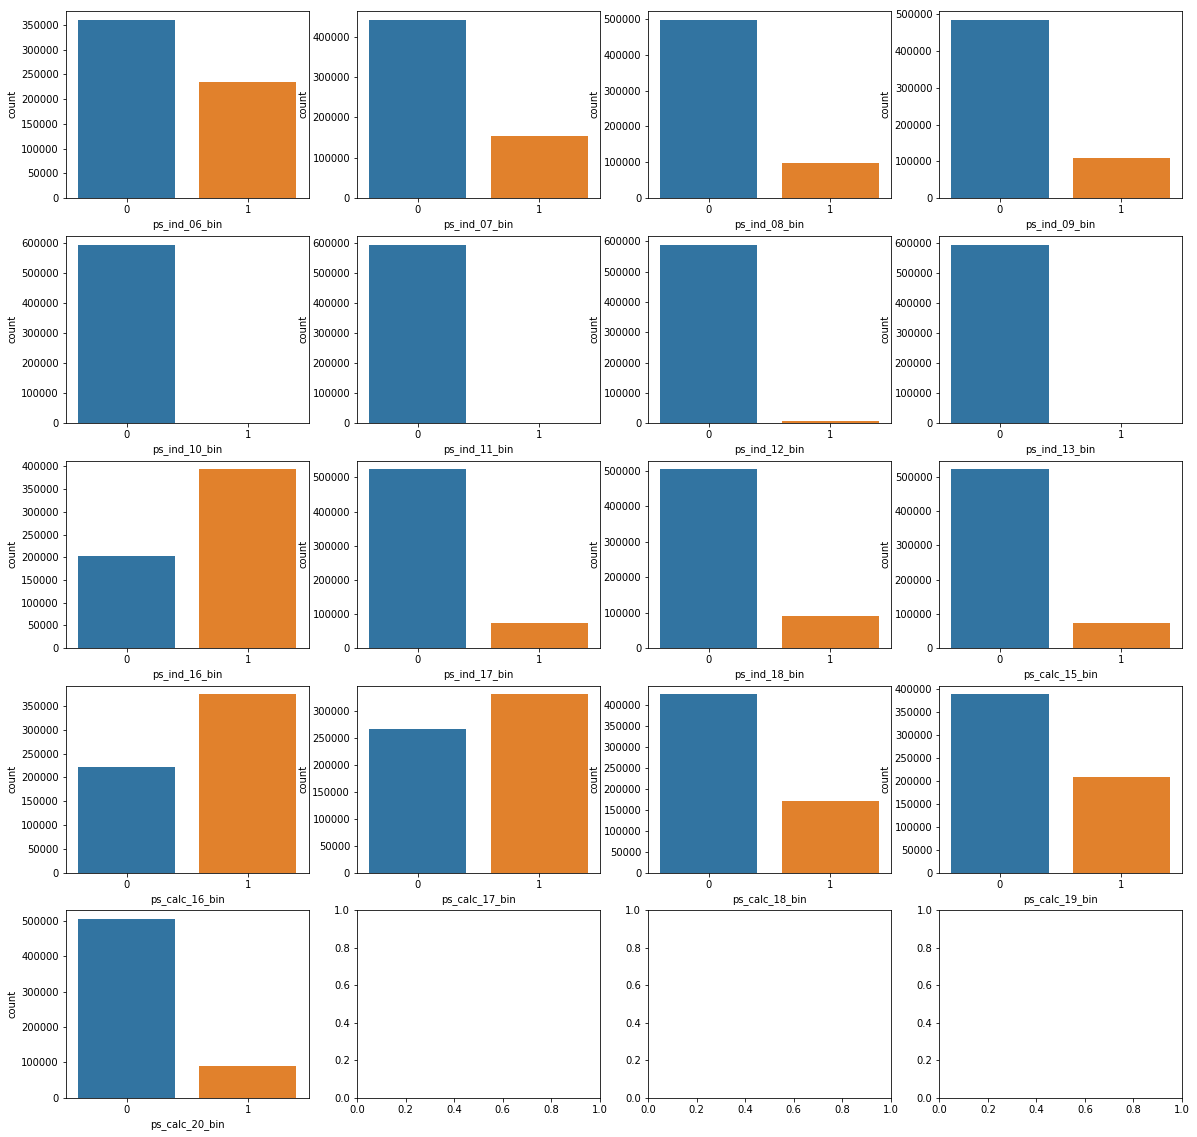

In [17]:
bin_cols = [col for col in combine.columns if col.endswith('_bin')]
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20,20))

for i, col in enumerate(bin_cols):
    sns.countplot(x = col, data=combine, ax=axs.ravel()[i])

Recuento gráfico de las variables categóricas

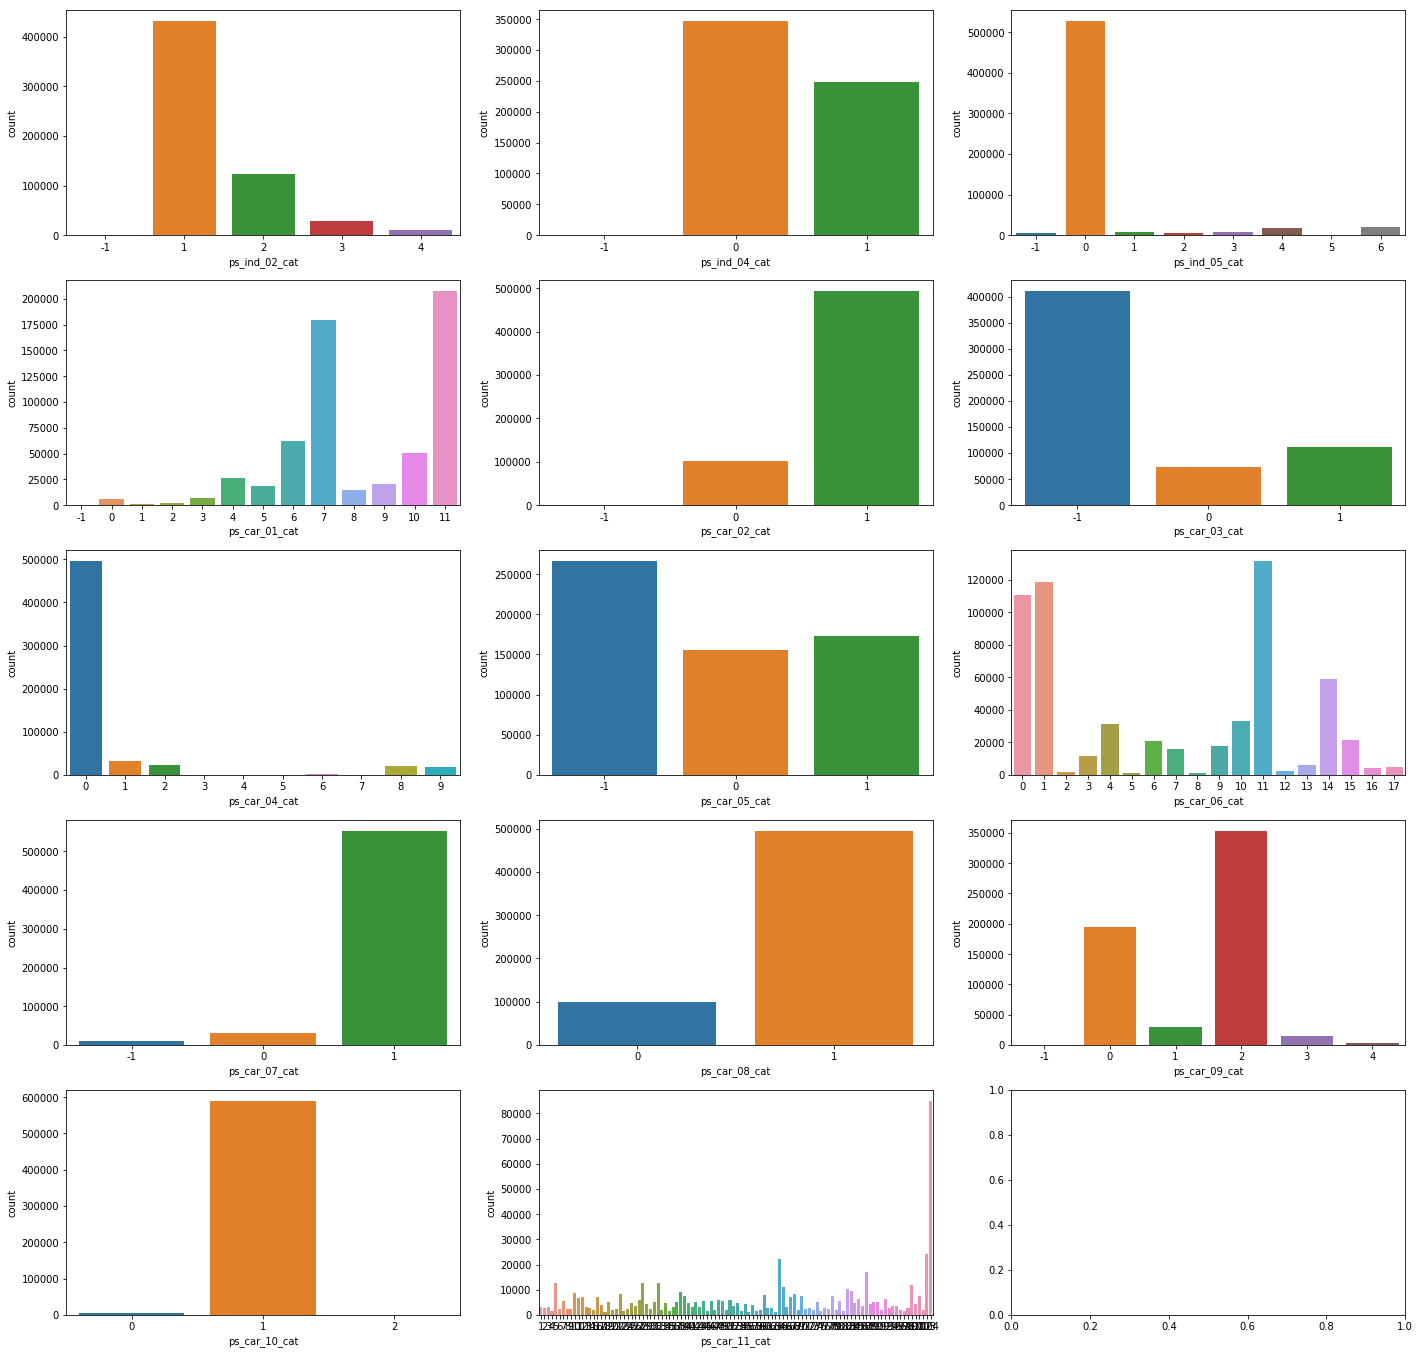

In [18]:
cat_cols = [col for col in combine.columns if col.endswith('_cat')]
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(24,24))

for i, col in enumerate(cat_cols):
    sns.countplot(x = col, data=combine, ax=axs.ravel()[i])

Recuento de las variables continuas de tipo int:

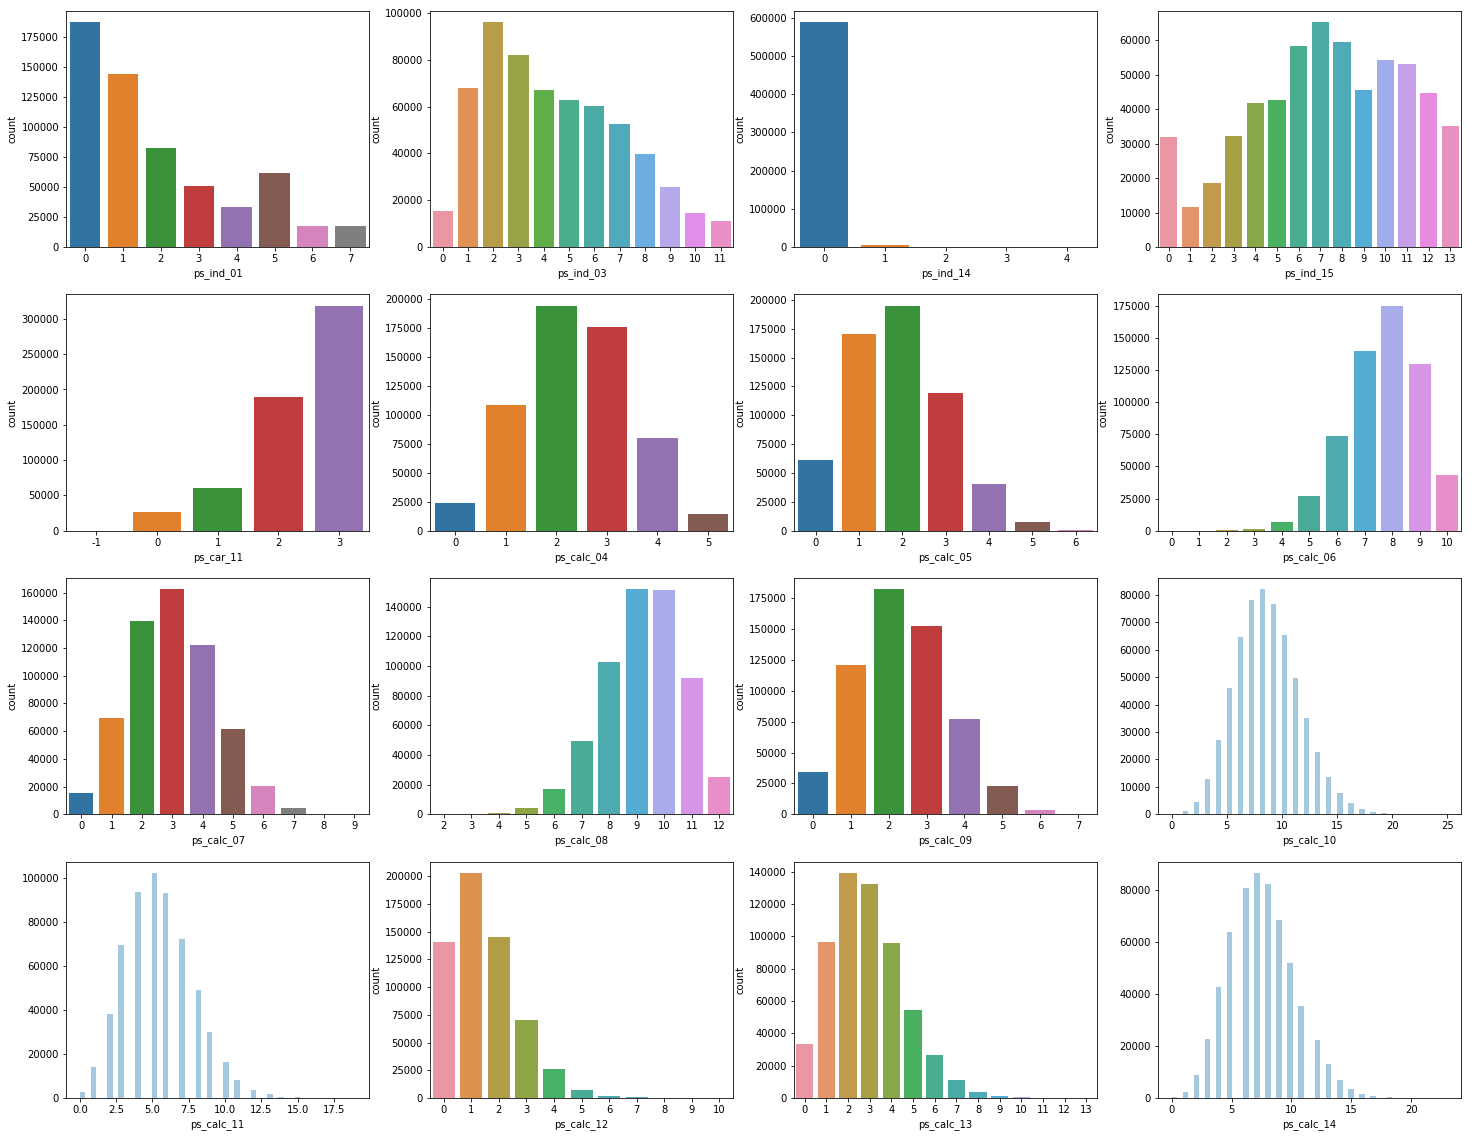

In [19]:
int_cols = [col for col in combine.columns if combine[col].dtype == 'int64']
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25,20))

for i, col in enumerate(int_cols):
    if 'calc_10' in col or 'calc_11' in col or 'calc_14' in col:
        sns.distplot(a = combine[col], kde = False, ax = axs.ravel()[i])
    else:
        sns.countplot(x = col, data=combine, ax=axs.ravel()[i])

Recuento de las variables continuas de tipo float:

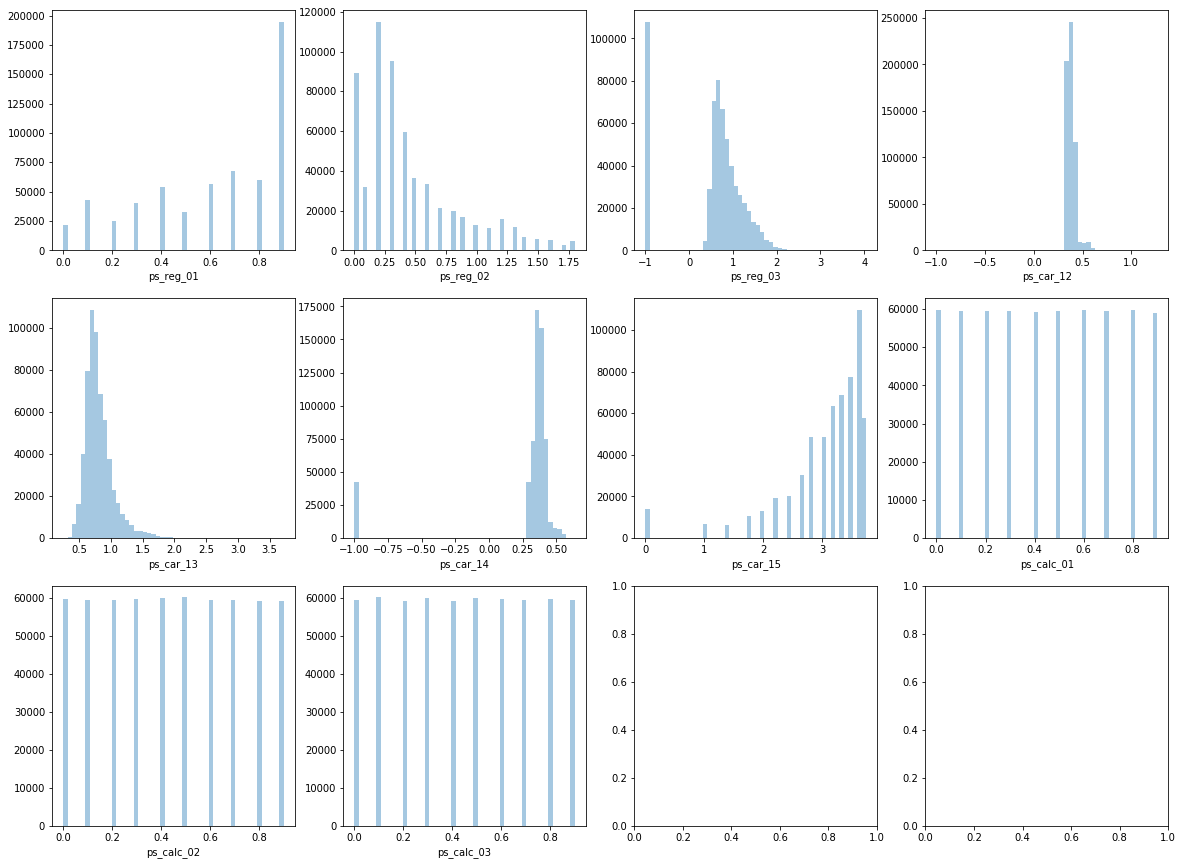

In [20]:
float_cols = [col for col in combine.columns if combine[col].dtype == 'float64']
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20,15))

for i, col in enumerate(float_cols):
    sns.distplot(a = combine[~combine[col].isnull()][col], kde= False,  ax=axs.ravel()[i])

Creamos una función para obtener el tipo de cada atributo entre ind, reg, car y calc que son las 4 agrupaciones de atributos del dataset.
Después usando la función recorremos la lista de atributos e los introducidmos en el grupo que correspondiente, formando 4 grupos a los que podremos aplicar análisis por separado.

In [21]:
def obtener_tipo(fichero):
    pos1 = fichero.find("_")
    pos2 = fichero.find("_",pos1+1)
    tipo = fichero[pos1+1:pos2].lower()

    return tipo

In [22]:
# recorremos la lista de columnas y agrupamos en 4 conjuntos 
lista_cols = list(X_train.columns)
inds, reg, car, calc = [],[],[],[]
for x in lista_cols:
    result = obtener_tipo(x)
    if result=='ind':
        inds.append(x)
    elif result=='reg':
        reg.append(x)
    elif result=='car':
        car.append(x)
    else:
        calc.append(x)
    
print(inds)
print(car)
print(reg)
print(calc)

['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']
['ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']
['ps_reg_01', 'ps_reg_02', 'ps_reg_03']
['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [23]:
# Obtenemos los 4 grupos con los datos de entrenamiento
X_train_inds = X_train[inds]
X_train_reg = X_train[reg]
X_train_car = X_train[car]
X_train_calc = X_train[calc]

print(X_train_inds.shape)
print(X_train_reg.shape)
print(X_train_car.shape)
print(X_train_calc.shape)

(416648, 18)
(416648, 3)
(416648, 16)
(416648, 20)


Graficamos la matriz de correlación entre las variables para cada grupo obtenido anteriormente.

In [24]:
# función correlaciones
def corr_grafico(datos, x, y):
    corr = datos.corr()
    plt.figure(figsize=(x, y))
    grafico = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True) 
    
    return grafico

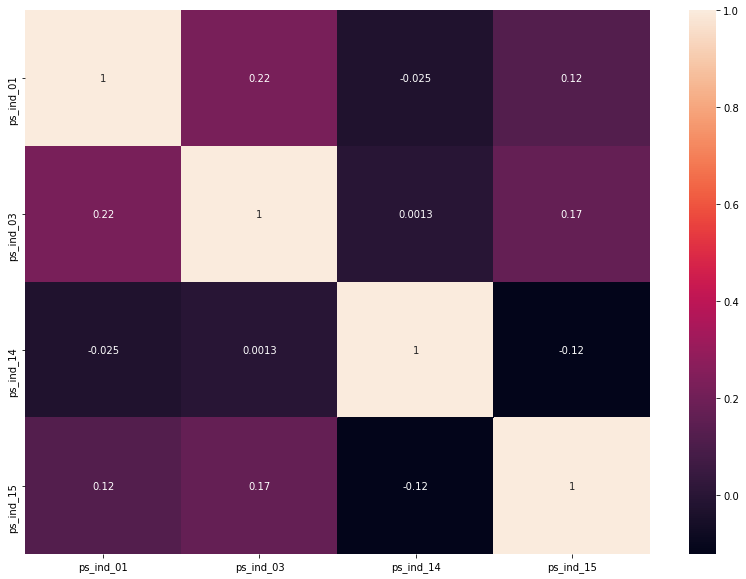

In [25]:
# estudio de correlaciones de las variables numéricas o continuas de cada clase o tipo
grafico = corr_grafico(X_train_inds, 14, 10)

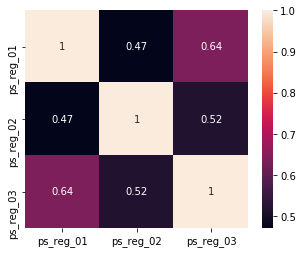

In [26]:
grafico = corr_grafico(X_train_reg, 5,4)

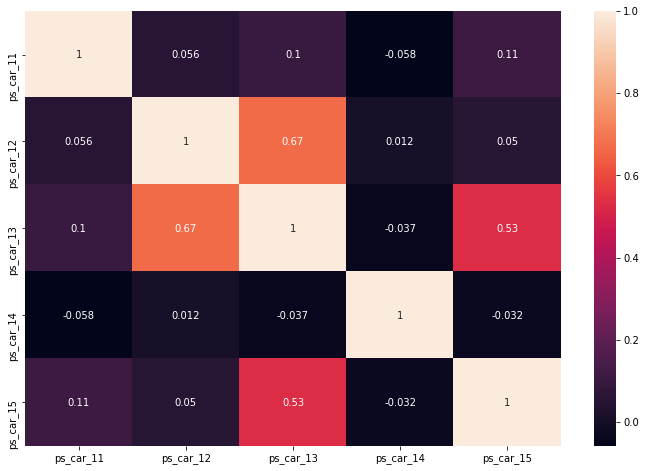

In [27]:
grafico = corr_grafico(X_train_car, 12, 8)

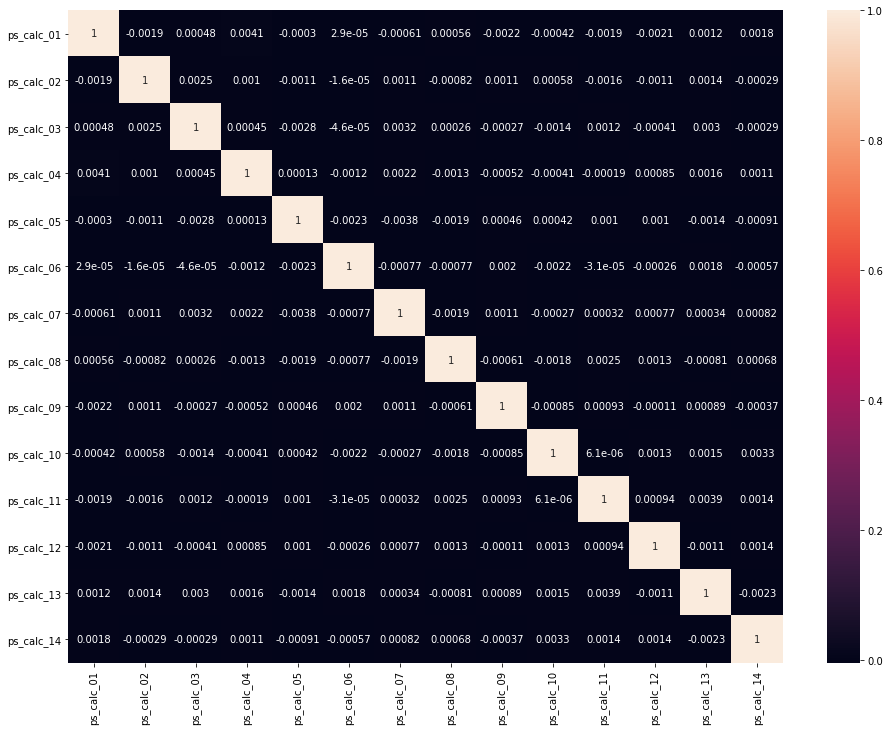

In [28]:
grafico = corr_grafico(X_train_calc, 16, 12)

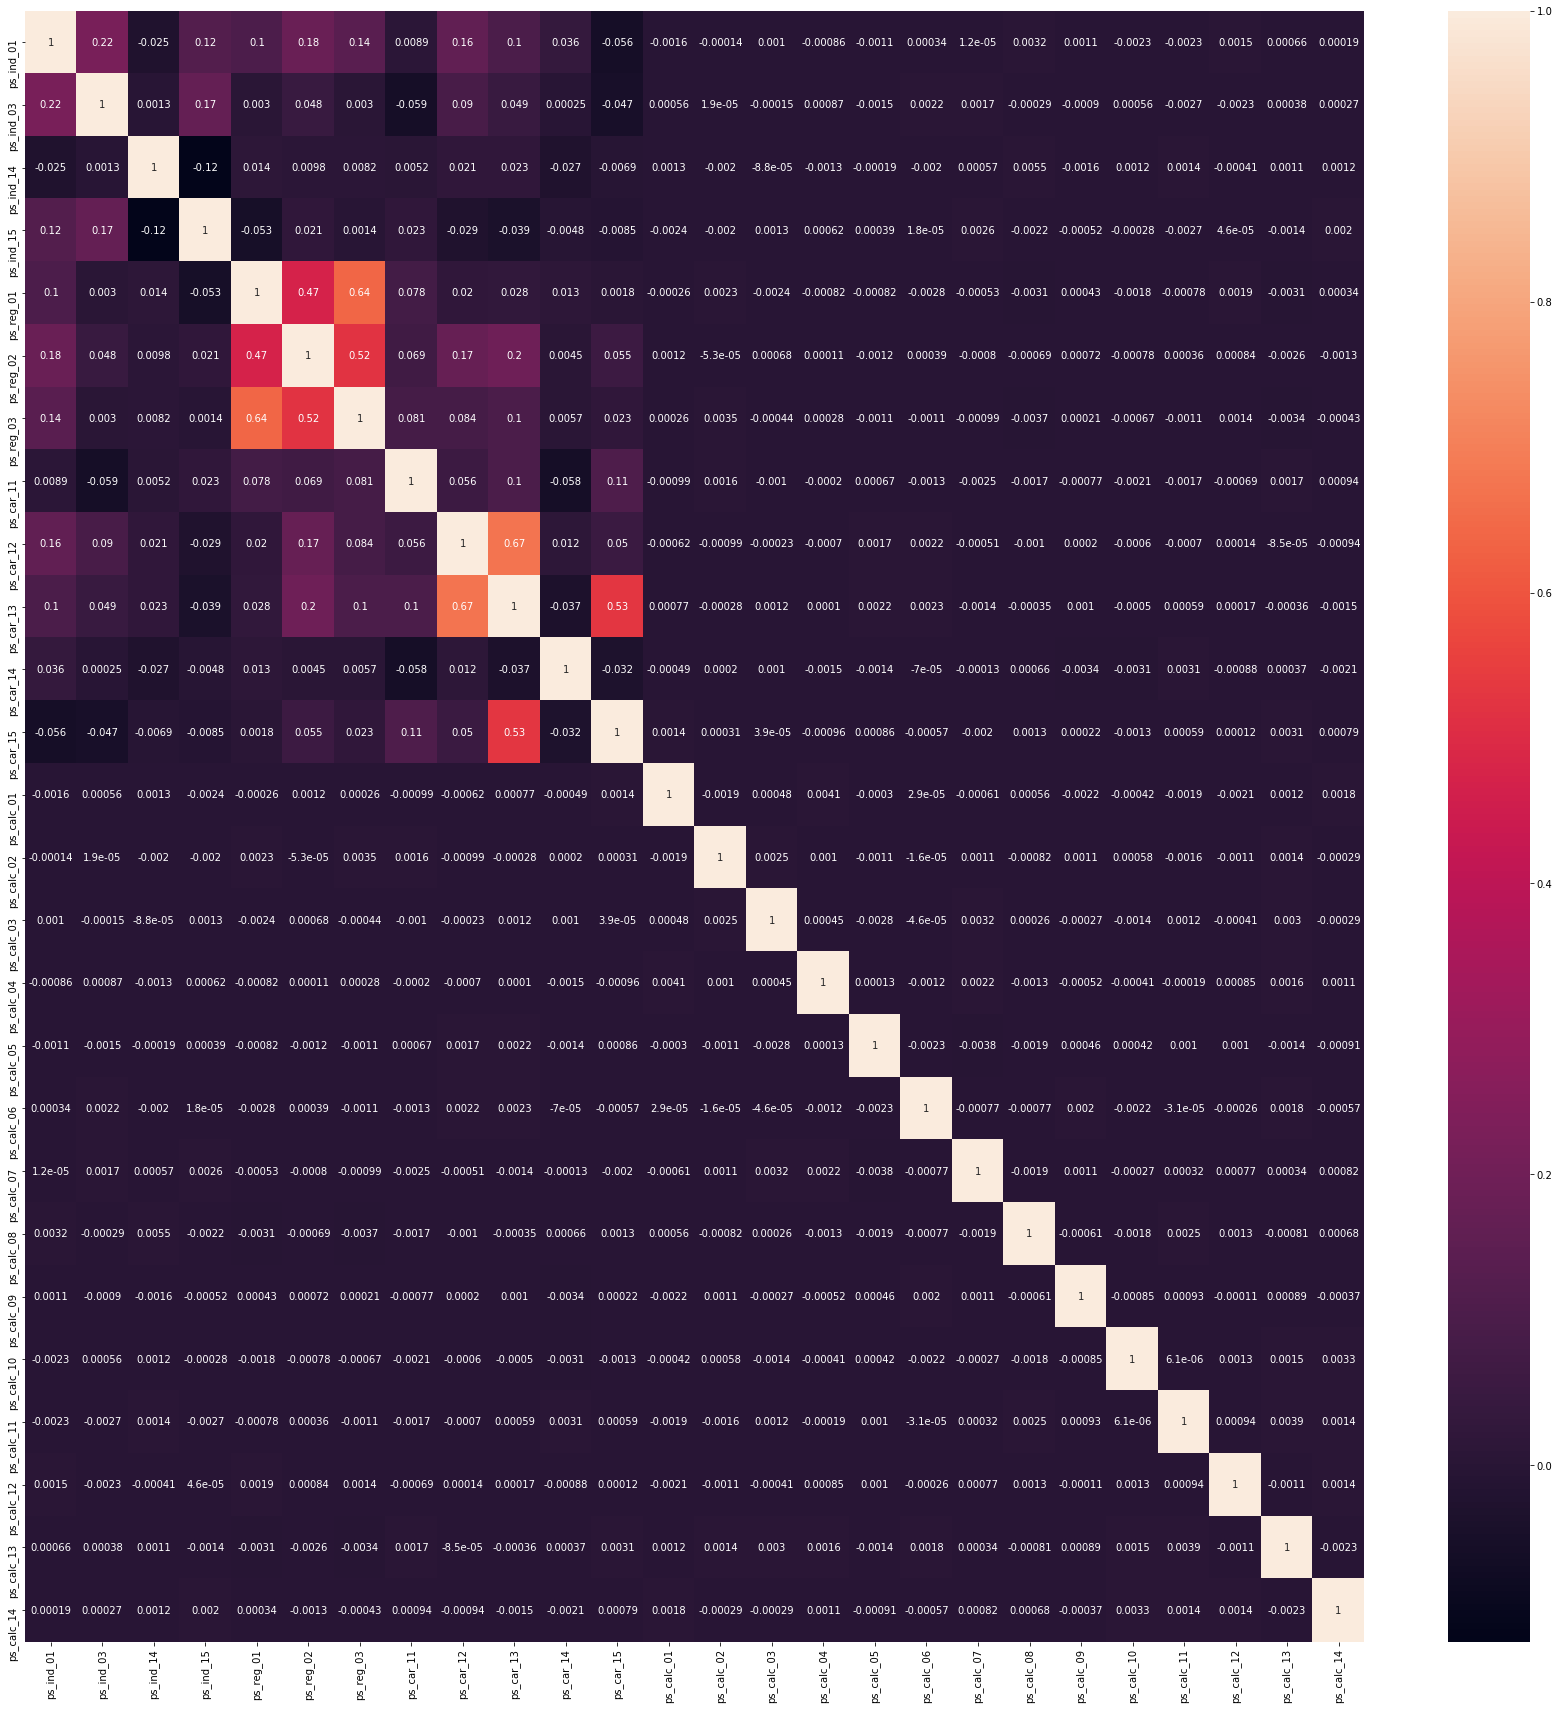

In [29]:
# todos los atributos
grafico = corr_grafico(X_train, 30, 30)

Estudiando la correlación entre variables con el uso de las matrices anteriores no se ven grandes correlaciones que impliquen que se puedan eliminar ciertas variables al estar contenidas en otras.

Ahora podemos usar los gráficos boxplot para ver la distribución y outliers de los datos.

In [30]:
# función boxplot
def boxplot_grafico(datos, x, y):
    plt.figure(figsize=(x, y))
    sns.set_style("white")
    grafico = sns.boxplot(data=datos)
   
    return grafico

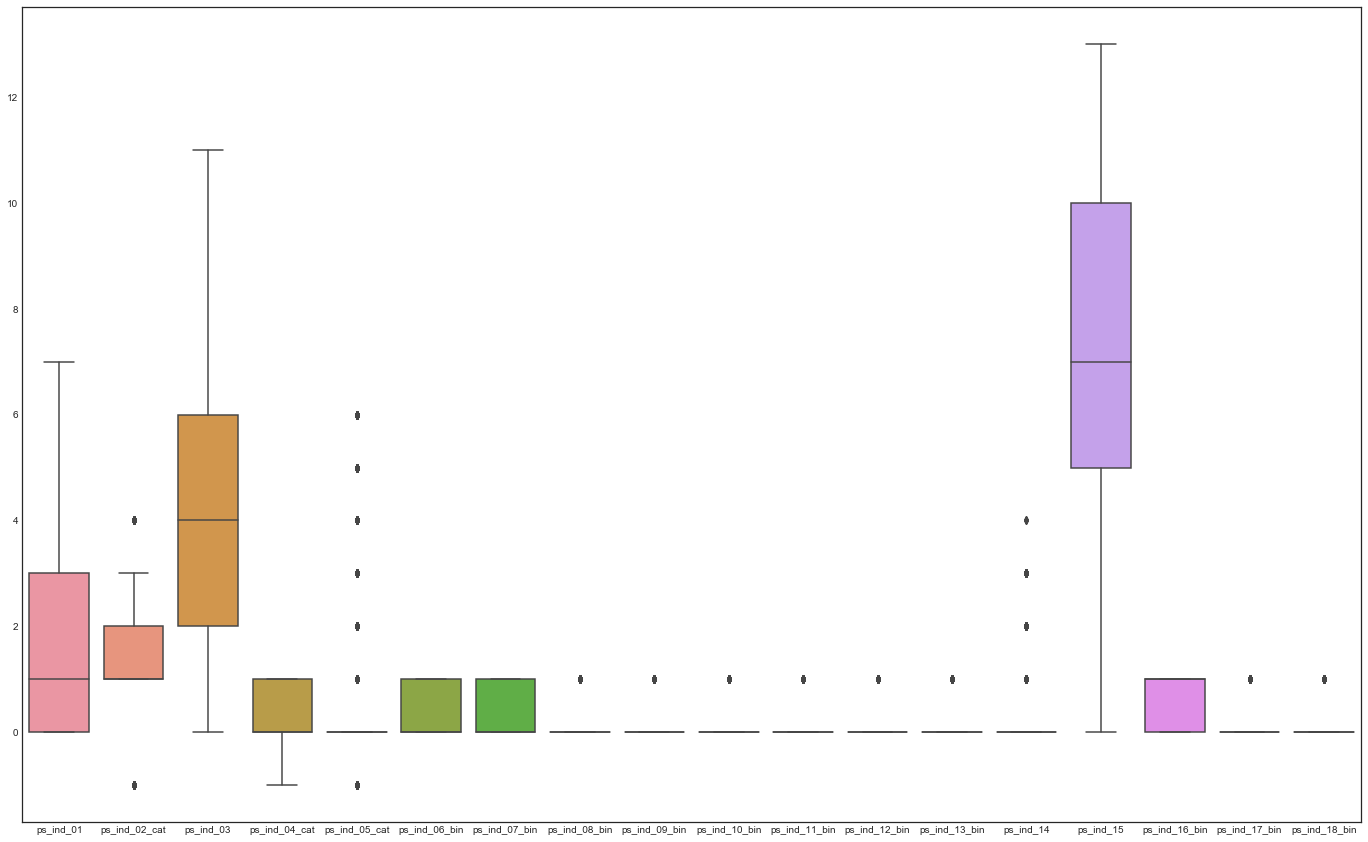

In [31]:
grafico = boxplot_grafico(X_train_inds, 24, 15)

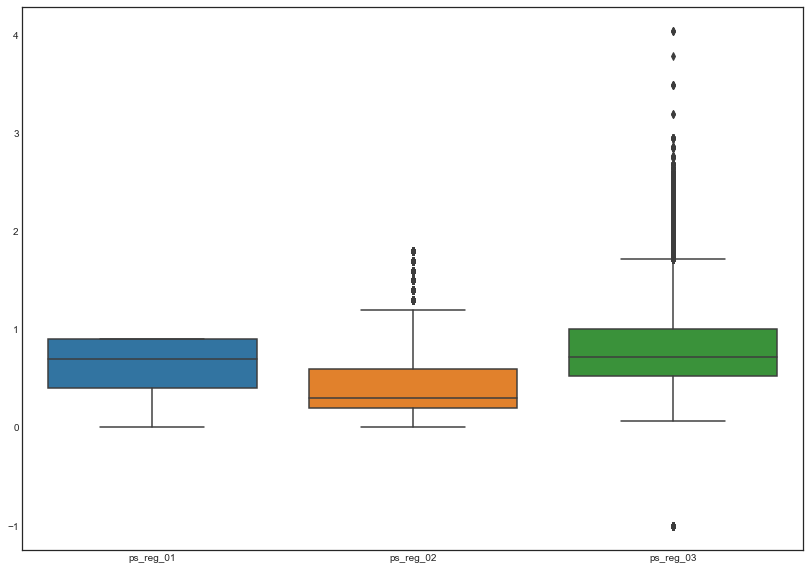

In [32]:
grafico = boxplot_grafico(X_train_reg, 14, 10)

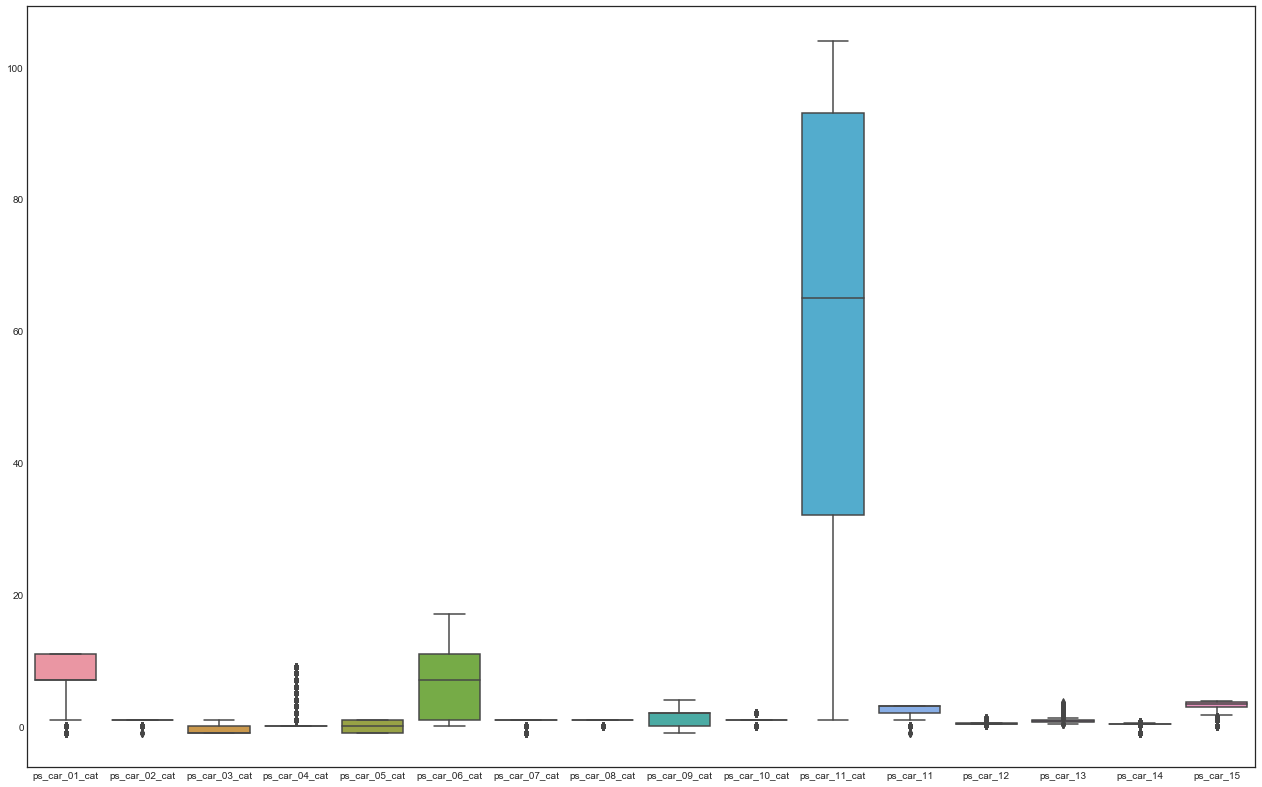

In [33]:
grafico = boxplot_grafico(X_train_car, 22, 14)

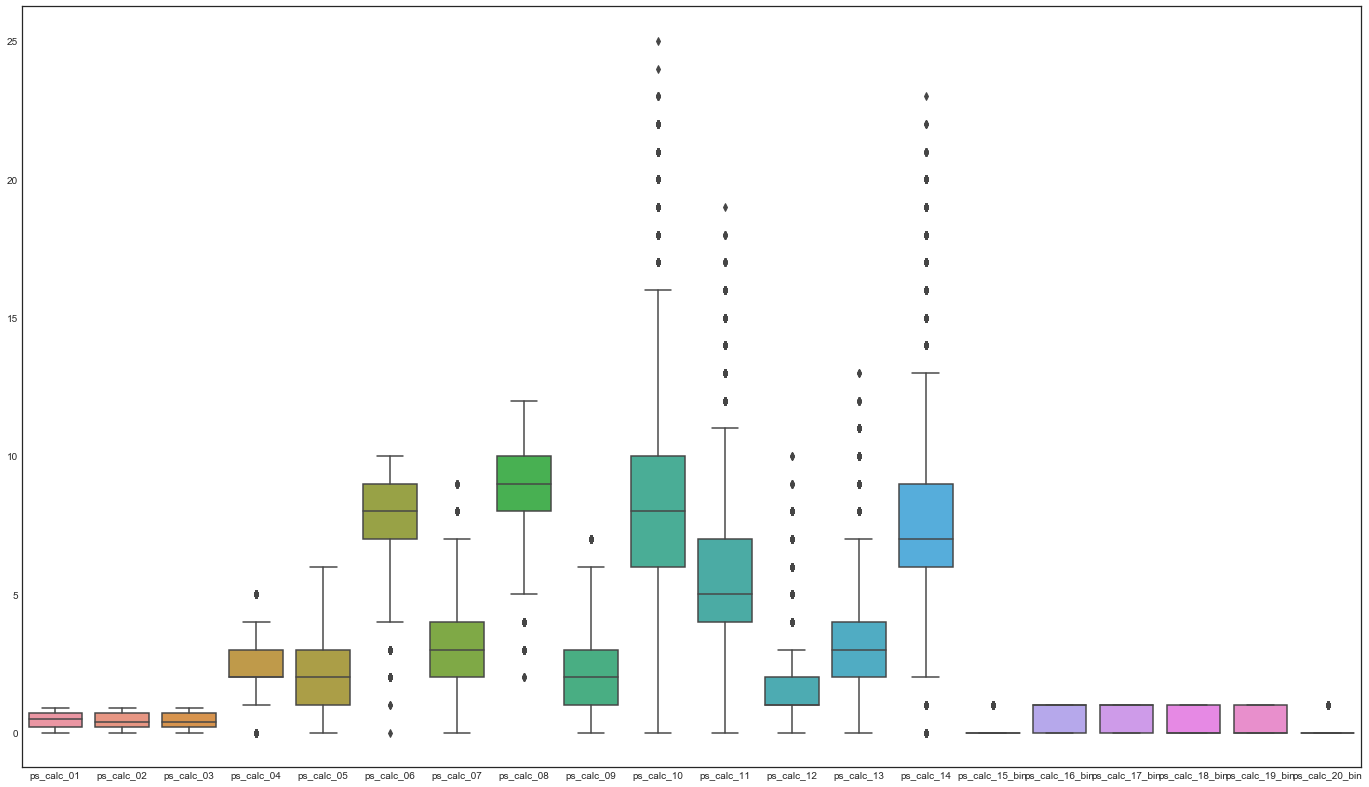

In [34]:
grafico = boxplot_grafico(X_train_calc, 24, 14)

Una forma de eliminar outliers, sería eliminar los datos que estuvieran muy alejados. Esto habría que hacerlo para cada atributo no categórico e ir eliminando los registros considerados outliers.

Hacemos uso de una función "eliminar_outliers" y vemos como trás aplicarla baja el número de registros atípicos:

In [35]:
def eliminar_outliers(data):
    for x in data.columns:
        if data[x].dtype == 'int64' or data[x].dtype == 'float64':
            df_WithoutOutliers = data[np.abs(data[x]-data[x].mean()) \
                                   <=(3*data[x].std())]
    return df_WithoutOutliers
    
df_WithoutOutliers = eliminar_outliers(X_train)

print("Before outer analysis:{}".format(X_train.shape))
print("After outer analysis:{}".format(df_WithoutOutliers.shape))

Before outer analysis:(416648, 57)
After outer analysis:(414634, 57)


In [36]:
df_WithoutOutliers_inds = df_WithoutOutliers[inds]
df_WithoutOutliers_reg = df_WithoutOutliers[reg]
df_WithoutOutliers_car = df_WithoutOutliers[car]
df_WithoutOutliers_calc = df_WithoutOutliers[calc]

print(df_WithoutOutliers_inds.shape)
print(df_WithoutOutliers_reg.shape)
print(df_WithoutOutliers_car.shape)
print(df_WithoutOutliers_calc.shape)

(414634, 18)
(414634, 3)
(414634, 16)
(414634, 20)


Volvemos a pintar un gráfico boxplot para los datos "calc", y podemos apreciar como en alguna variable continua se han eliminado ciertos datos considerados outliers anteriormente.

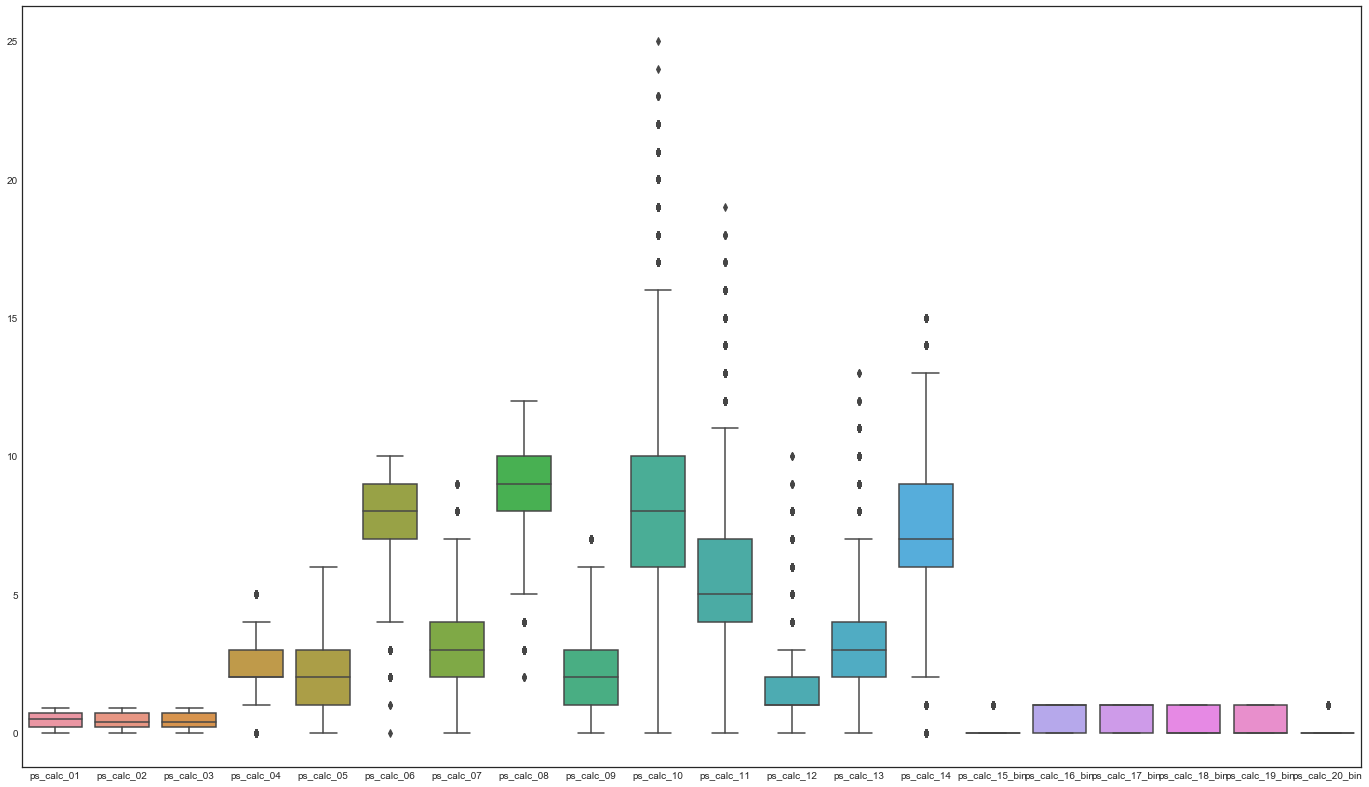

In [37]:
grafico = boxplot_grafico(df_WithoutOutliers_calc, 24, 14)

Ahora vamos a utilizar ciertos métodos de filtrado para realizar la selección de características. De esta forma veremos si podemos reducir la dimensionalidad del conjunto.

In [38]:
vars_X = list(X_train)
nombres_atributos = list(X_train.columns)

In [39]:
def is_categorical(array_like):
    return array_like.dtype.name == 'category'

In [40]:
# métodos de filtrado para intentar filtrar características del conjunto inicial
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import mutual_info_score

def mutual_information(x, y, bins):
    return mutual_info_score(None, None, contingency=np.histogram2d(x, y, bins)[0])

def ranking_variables_clasificacion(X, y, nombres, metodo, draw=False):
    nvars = np.shape(X)[1]
    if metodo == "mutual_info":
        for nom in nombres:
            if (nom in vars_X and not is_categorical(X_train[nom])) or (nom not in vars_X):  
                if nom in vars_X:
                    nbinsx = np.sqrt(len(X)/5)
                else:
                    nbinsx = 5
            else:
                nbinsx = np.shape(np.unique(y))[-1]
        nbinsy = np.shape(np.unique(y))[-1]
        bins = (nbinsx, nbinsy)
        scores = np.zeros(nvars)
        for i in np.arange(0,nvars):
            scores[i] = mutual_information(X[:,i].astype(float),y,bins)
        
    elif metodo == "f_classif": # f de ANOVA
        selector = SelectPercentile(f_classif, percentile=10)
        selector.fit(X, y)
        scores = selector.scores_
    
    elif metodo == "corr":
        scores = np.zeros(nvars)
        aux = y.T
        for i in np.arange(0,nvars):
            scores[i] = np.corrcoef(X[:,i].T.astype(float),aux)[0][1] ** 2

    inds_ = np.argsort(scores)[::-1]
 
    for ind in inds_:
        print("%s \t score=%f \t" % (nombres[ind], scores[ind]))
    
    if draw:
        plt.figure(figsize=(10,5))
        plt.bar(range(X.shape[1]),scores[inds_], width=.2, color='lightgreen')
        plt.xticks(range(X.shape[1]), np.array(nombres)[inds_], rotation=80)
        plt.ylabel("Score")
        plt.show()

In [41]:
# pasar a array los conjuntos para algunos métodos de clasificación
X_train_array = np.asarray(X_train)
clases_train_array = np.asarray(clases_train)
X_test_array = np.asarray(X_test)
clases_test_array = np.asarray(clases_test)

In [42]:
ranking_variables_clasificacion(X_train,clases_train,nombres_atributos,"f_classif")

ps_car_13 	 score=1216.395807 	
ps_car_12 	 score=654.139602 	
ps_ind_17_bin 	 score=548.569924 	
ps_car_07_cat 	 score=548.005036 	
ps_car_04_cat 	 score=510.754432 	
ps_reg_02 	 score=501.387414 	
ps_ind_07_bin 	 score=486.728681 	
ps_ind_06_bin 	 score=467.785768 	
ps_car_03_cat 	 score=431.901771 	
ps_car_02_cat 	 score=409.093290 	
ps_ind_05_cat 	 score=369.673019 	
ps_reg_03 	 score=359.592543 	
ps_ind_16_bin 	 score=328.539762 	
ps_car_15 	 score=297.104674 	
ps_ind_15 	 score=211.928078 	
ps_reg_01 	 score=195.180135 	
ps_car_05_cat 	 score=181.728300 	
ps_car_08_cat 	 score=154.353578 	
ps_ind_01 	 score=126.569698 	
ps_car_01_cat 	 score=101.627227 	
ps_ind_08_bin 	 score=74.582781 	
ps_car_06_cat 	 score=52.189262 	
ps_ind_12_bin 	 score=42.641687 	
ps_ind_04_cat 	 score=41.014677 	
ps_ind_14 	 score=37.192781 	
ps_ind_09_bin 	 score=34.146270 	
ps_car_11_cat 	 score=26.733700 	
ps_ind_03 	 score=22.248037 	
ps_ind_18_bin 	 score=16.046495 	
ps_car_09_cat 	 score=8.223939 	


ps_ind_17_bin 	 score=0.000584 	
ps_ind_06_bin 	 score=0.000578 	
ps_ind_07_bin 	 score=0.000552 	
ps_car_03_cat 	 score=0.000429 	
ps_car_04_cat 	 score=0.000414 	
ps_ind_16_bin 	 score=0.000383 	
ps_car_07_cat 	 score=0.000371 	
ps_reg_02 	 score=0.000342 	
ps_ind_05_cat 	 score=0.000335 	
ps_car_05_cat 	 score=0.000269 	
ps_car_08_cat 	 score=0.000176 	
ps_ind_15 	 score=0.000176 	
ps_reg_01 	 score=0.000174 	
ps_car_15 	 score=0.000172 	
ps_reg_03 	 score=0.000156 	
ps_ind_01 	 score=0.000106 	
ps_ind_04_cat 	 score=0.000102 	
ps_ind_03 	 score=0.000098 	
ps_ind_08_bin 	 score=0.000086 	
ps_car_11 	 score=0.000074 	
ps_ind_12_bin 	 score=0.000044 	
ps_ind_09_bin 	 score=0.000042 	
ps_car_13 	 score=0.000041 	
ps_car_06_cat 	 score=0.000032 	
ps_car_01_cat 	 score=0.000025 	
ps_car_11_cat 	 score=0.000021 	
ps_ind_18_bin 	 score=0.000019 	
ps_car_14 	 score=0.000016 	
ps_ind_02_cat 	 score=0.000015 	
ps_car_12 	 score=0.000007 	
ps_ind_11_bin 	 score=0.000006 	
ps_ind_14 	 score=0.0

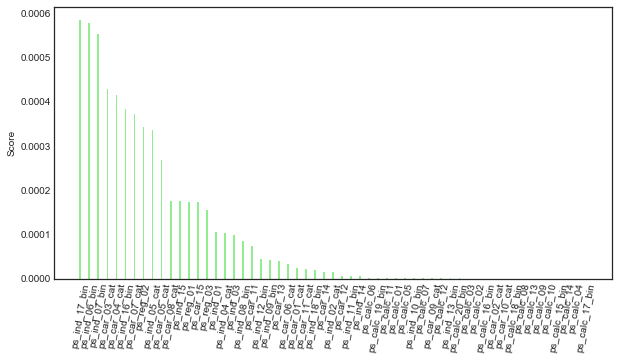

In [43]:
# método mutual information
ranking_variables_clasificacion(X_train_array,clases_train_array,nombres_atributos,"mutual_info",draw=True)

ps_car_13 	 score=0.002911 	
ps_car_12 	 score=0.001568 	
ps_ind_17_bin 	 score=0.001315 	
ps_car_07_cat 	 score=0.001314 	
ps_car_04_cat 	 score=0.001224 	
ps_reg_02 	 score=0.001202 	
ps_ind_07_bin 	 score=0.001167 	
ps_ind_06_bin 	 score=0.001121 	
ps_car_03_cat 	 score=0.001036 	
ps_car_02_cat 	 score=0.000981 	
ps_ind_05_cat 	 score=0.000886 	
ps_reg_03 	 score=0.000862 	
ps_ind_16_bin 	 score=0.000788 	
ps_car_15 	 score=0.000713 	
ps_ind_15 	 score=0.000508 	
ps_reg_01 	 score=0.000468 	
ps_car_05_cat 	 score=0.000436 	
ps_car_08_cat 	 score=0.000370 	
ps_ind_01 	 score=0.000304 	
ps_car_01_cat 	 score=0.000244 	
ps_ind_08_bin 	 score=0.000179 	
ps_car_06_cat 	 score=0.000125 	
ps_ind_12_bin 	 score=0.000102 	
ps_ind_04_cat 	 score=0.000098 	
ps_ind_14 	 score=0.000089 	
ps_ind_09_bin 	 score=0.000082 	
ps_car_11_cat 	 score=0.000064 	
ps_ind_03 	 score=0.000053 	
ps_ind_18_bin 	 score=0.000039 	
ps_car_09_cat 	 score=0.000020 	
ps_car_14 	 score=0.000018 	
ps_ind_02_cat 	 score

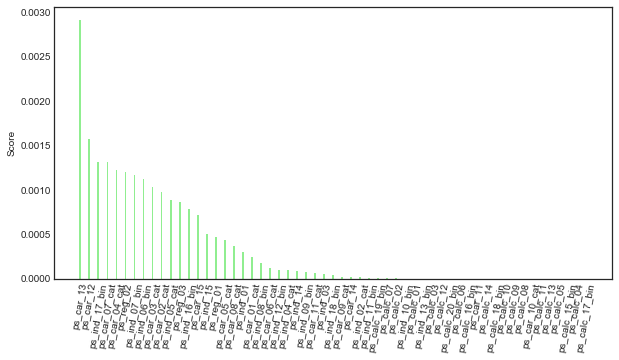

In [44]:
# método corr
ranking_variables_clasificacion(X_train_array,clases_train_array,nombres_atributos,"corr",draw=True)

Según estos tres métodos utilizados (métodos de filtrado que evaluan el score individualmente de cada atributo) y viéndolos en conjunto, se aprecia como aproximadamente en cada uno hay alrededor de 25 atributos que tienen un score bajo según el método correspondiente y podrían no tenerse en cuenta. 

Si vemos el listado por cada método por separado, podemos apreciar como aunque con distinto orden, al final los atributos con mayor score son los mismos.

Método 1

ps_car_13 	 score=1216.395807 	
ps_car_12 	 score=654.139602 	
ps_ind_17_bin 	 score=548.569924 	
ps_car_07_cat 	 score=548.005036 	
ps_car_04_cat 	 score=510.754432 	
ps_reg_02 	 score=501.387414 	
ps_ind_07_bin 	 score=486.728681 	
ps_ind_06_bin 	 score=467.785768 	
ps_car_03_cat 	 score=431.901771 	
ps_car_02_cat 	 score=409.093290 	
ps_ind_05_cat 	 score=369.673019 	
ps_reg_03 	 score=359.592543 	
ps_ind_16_bin 	 score=328.539762 	
ps_car_15 	 score=297.104674 	
ps_ind_15 	 score=211.928078 	
ps_reg_01 	 score=195.180135 	
ps_car_05_cat 	 score=181.728300 	
ps_car_08_cat 	 score=154.353578 	
ps_ind_01 	 score=126.569698 	
ps_car_01_cat 	 score=101.627227 	
ps_ind_08_bin 	 score=74.582781 	
ps_car_06_cat 	 score=52.189262 	
ps_ind_12_bin 	 score=42.641687 	
ps_ind_04_cat 	 score=41.014677 	
ps_ind_14 	 score=37.192781 	
ps_ind_09_bin 	 score=34.146270 	
ps_car_11_cat 	 score=26.733700 	
ps_ind_03 	 score=22.248037 	
ps_ind_18_bin 	 score=16.046495 	
ps_car_09_cat 	 score=8.223939 	
ps_car_14 	 score=7.559270 	
ps_ind_02_cat 	 score=6.642445 	
ps_ind_11_bin 	 score=5.493541 	


Método 2

ps_ind_17_bin 	 score=0.000584 	
ps_ind_06_bin 	 score=0.000578 	
ps_ind_07_bin 	 score=0.000552 	
ps_car_03_cat 	 score=0.000429 	
ps_car_04_cat 	 score=0.000414 	
ps_ind_16_bin 	 score=0.000383 	
ps_car_07_cat 	 score=0.000371 	
ps_reg_02 	 score=0.000342 	
ps_ind_05_cat 	 score=0.000335 	
ps_car_05_cat 	 score=0.000269 	
ps_car_08_cat 	 score=0.000176 	
ps_ind_15 	 score=0.000176 	
ps_reg_01 	 score=0.000174 	
ps_car_15 	 score=0.000172 	
ps_reg_03 	 score=0.000156 	
ps_ind_01 	 score=0.000106 	
ps_ind_04_cat 	 score=0.000102 	
ps_ind_03 	 score=0.000098 	
ps_ind_08_bin 	 score=0.000086 	
ps_car_11 	 score=0.000074 	
ps_ind_12_bin 	 score=0.000044 	
ps_ind_09_bin 	 score=0.000042 	
ps_car_13 	 score=0.000041 	
ps_car_06_cat 	 score=0.000032 	
ps_car_01_cat 	 score=0.000025 	
ps_car_11_cat 	 score=0.000021 	
ps_ind_18_bin 	 score=0.000019 	
ps_car_14 	 score=0.000016 	
ps_ind_02_cat 	 score=0.000015 	
ps_car_12 	 score=0.000007 	
ps_ind_11_bin 	 score=0.000006 	
ps_ind_14 	 score=0.000006 	


Método 3

ps_car_13 	 score=0.002911 	
ps_car_12 	 score=0.001568 	
ps_ind_17_bin 	 score=0.001315 	
ps_car_07_cat 	 score=0.001314 	
ps_car_04_cat 	 score=0.001224 	
ps_reg_02 	 score=0.001202 	
ps_ind_07_bin 	 score=0.001167 	
ps_ind_06_bin 	 score=0.001121 	
ps_car_03_cat 	 score=0.001036 	
ps_car_02_cat 	 score=0.000981 	
ps_ind_05_cat 	 score=0.000886 	
ps_reg_03 	 score=0.000862 	
ps_ind_16_bin 	 score=0.000788 	
ps_car_15 	 score=0.000713 	
ps_ind_15 	 score=0.000508 	
ps_reg_01 	 score=0.000468 	
ps_car_05_cat 	 score=0.000436 	
ps_car_08_cat 	 score=0.000370 	
ps_ind_01 	 score=0.000304 	
ps_car_01_cat 	 score=0.000244 	
ps_ind_08_bin 	 score=0.000179 	
ps_car_06_cat 	 score=0.000125 	
ps_ind_12_bin 	 score=0.000102 	
ps_ind_04_cat 	 score=0.000098 	
ps_ind_14 	 score=0.000089 	
ps_ind_09_bin 	 score=0.000082 	
ps_car_11_cat 	 score=0.000064 	
ps_ind_03 	 score=0.000053 	
ps_ind_18_bin 	 score=0.000039 	
ps_car_09_cat 	 score=0.000020 	
ps_car_14 	 score=0.000018 	
ps_ind_02_cat 	 score=0.000016 	
ps_ind_11_bin 	 score=0.000013 	


Otra estrategia que podemos emplear podría ser, entrenar un modelo auxiliar que esté diseñado también para dar la importancia de los atributos, y seleccionar usando esta información, los atributos que finalmente se usarían en nuestro modelo.

Por ejemplo el método de wrapping evalua en un conjunto los atributos, y se queda con el grupo de ellos que mejor score obtenga.

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier as kNN

aux1 = ExtraTreesClassifier(n_estimators = 21)
aux1.fit(X_train, clases_train)

print(aux1.feature_importances_)

aux2 = SelectFromModel(aux1, prefit=True)
inds_elegidos = np.where(aux2.get_support())[0]
print("\nElegidos:")
print(np.array(nombres_atributos)[inds_elegidos])

[0.02540307 0.01737894 0.02852981 0.01375291 0.01306652 0.00352448
 0.00364256 0.00413848 0.0041033  0.00016561 0.0004299  0.00153184
 0.00027671 0.00161893 0.02801921 0.00669241 0.00345916 0.00546605
 0.02512063 0.02819116 0.02783794 0.02335524 0.00725827 0.01082186
 0.01069882 0.01593872 0.02527952 0.00645542 0.00746825 0.01847294
 0.00192008 0.02604445 0.01867317 0.02494812 0.03069006 0.02668147
 0.02569083 0.02818882 0.0284948  0.02829682 0.02660441 0.02631252
 0.02783375 0.02802643 0.02761463 0.02753078 0.02951551 0.029316
 0.02695909 0.02799724 0.02962789 0.01043532 0.01614499 0.0162438
 0.01495971 0.0153186  0.01183204]

Elegidos:
['ps_ind_01' 'ps_ind_03' 'ps_ind_15' 'ps_reg_01' 'ps_reg_02' 'ps_reg_03'
 'ps_car_01_cat' 'ps_car_06_cat' 'ps_car_09_cat' 'ps_car_11_cat'
 'ps_car_11' 'ps_car_12' 'ps_car_13' 'ps_car_14' 'ps_car_15' 'ps_calc_01'
 'ps_calc_02' 'ps_calc_03' 'ps_calc_04' 'ps_calc_05' 'ps_calc_06'
 'ps_calc_07' 'ps_calc_08' 'ps_calc_09' 'ps_calc_10' 'ps_calc_11'
 'ps_calc_

Con este método obtenemos también alrededor de 30 atributos del total, lo cual encaja con lo obtenido anteriormente,  pero empleando este método obtenemos un conjuto de atributos distinto del obtenido anteriomente.

También podemos apoyarnos en técnicas de extracción de características, para lo cual usamos PCA:

In [46]:
# extracción de características. Usamos PCA.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_std = StandardScaler().fit_transform(X_train)
pca = PCA()
X_pca = pca.fit_transform(X_std)

print()
print('-- Estadísticas de los datos proyectados en las componentes principales --')
print()

for i in range(X_pca.shape[1]):
    print("* Datos en componente principal", i+1, ":")
    print("  - Media    :", X_pca[:,i].mean().round(3))
    print("  - Varianza :", X_pca[:,i].var(ddof=1).round(3))
    print("  - Autovalor:", pca.explained_variance_[i].round(3))
    print("  - Varianza explicada:", (100*pca.explained_variance_ratio_[i]).round(3), "%")
    print()


-- Estadísticas de los datos proyectados en las componentes principales --

* Datos en componente principal 1 :
  - Media    : 0.0
  - Varianza : 3.625
  - Autovalor: 3.625
  - Varianza explicada: 6.36 %

* Datos en componente principal 2 :
  - Media    : -0.0
  - Varianza : 2.592
  - Autovalor: 2.592
  - Varianza explicada: 4.547 %

* Datos en componente principal 3 :
  - Media    : 0.0
  - Varianza : 2.273
  - Autovalor: 2.273
  - Varianza explicada: 3.989 %

* Datos en componente principal 4 :
  - Media    : 0.0
  - Varianza : 1.981
  - Autovalor: 1.981
  - Varianza explicada: 3.475 %

* Datos en componente principal 5 :
  - Media    : -0.0
  - Varianza : 1.859
  - Autovalor: 1.859
  - Varianza explicada: 3.262 %

* Datos en componente principal 6 :
  - Media    : -0.0
  - Varianza : 1.754
  - Autovalor: 1.754
  - Varianza explicada: 3.077 %

* Datos en componente principal 7 :
  - Media    : 0.0
  - Varianza : 1.593
  - Autovalor: 1.593
  - Varianza explicada: 2.795 %

* Datos en 

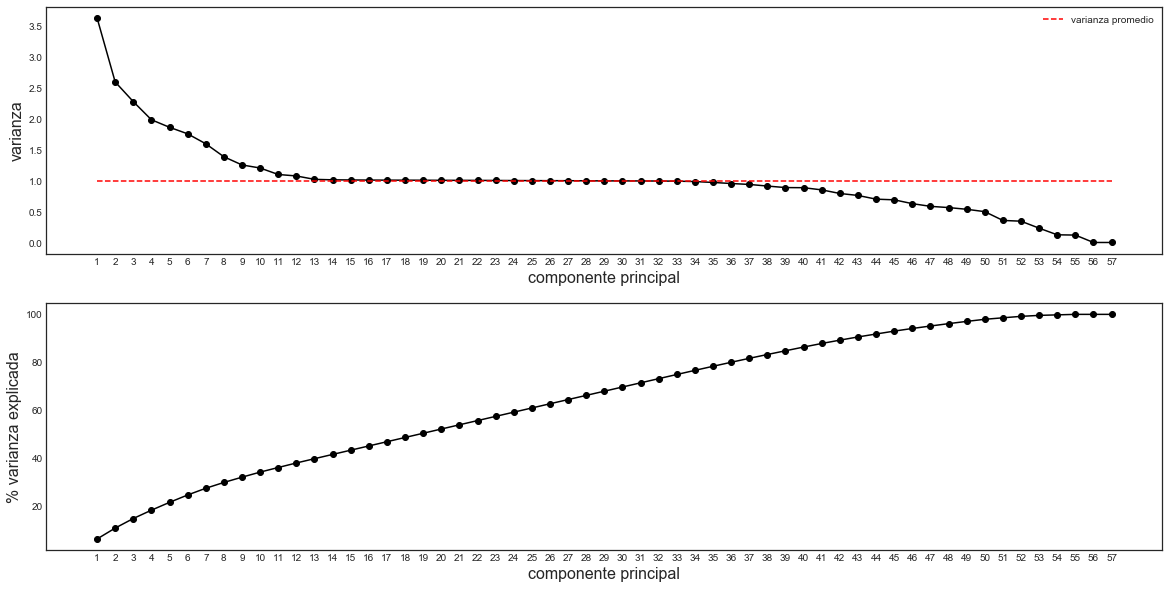

In [47]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(range(1,pca.n_components_+1), pca.explained_variance_, '-ok')
plt.plot([1,pca.n_components_], [1,1], '--r', label='varianza promedio')
plt.legend()
plt.xlabel('componente principal', fontsize=16)
plt.ylabel('varianza', fontsize=16)
plt.xticks(range(1,pca.n_components_+1))

plt.subplot(2,1,2)
plt.plot(range(1,pca.n_components_+1),
         100*pca.explained_variance_ratio_.cumsum(), '-ok')
plt.xlabel('componente principal', fontsize=16)
plt.ylabel('% varianza explicada', fontsize=16)
plt.xticks(range(1,pca.n_components_+1))
plt.show()

Al aplicar la ténica PCA y obtener las 57 componentes principales, una por atributo, podemos ver en los datos los valores obtenidos para cada componente y luego en las gráficas como en un rango de alrededor de 30 componentes nos encontramos un valor bastante aceptable de varianza acumulada, con lo cual con unos 30-35 atributos se podría tener un gran grado de información del problema.

In [48]:
pcs_names = ['componente principal '+str(i+1) for i in range(pca.n_components_)]

Vamos a graficar algunas de las primeras y más importantes componentes principales, y veremos también que atributos de los originales tienen mayor importancia para cada una de las componentes.

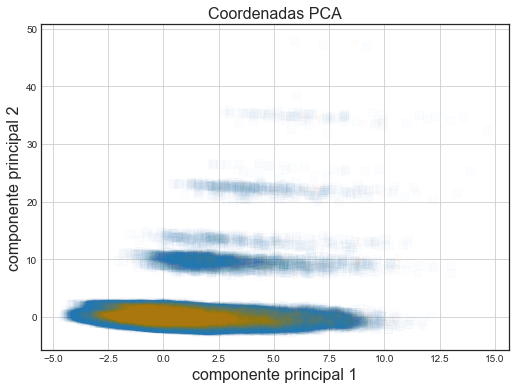

In [49]:
# graficamos componente principal 1 y componente principal 2
y = clases_train
pc_x = 0
pc_y = 1

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['s', 'v', 'o', 'd', 's', 'v', 'o', 'd', 's']

fig = plt.figure(figsize=(7,5))
for label,color,marker in zip(np.unique(y),colors,markers):
    inds = np.where(y == label)[0]
    plt.scatter(X_pca[inds, pc_x],
                X_pca[inds, pc_y],
                s = 60,
                c = color,
                marker = marker,
                alpha = 0.01,
                cmap='RdYlGn',
                label = label)

plt.grid(); plt.tight_layout()
plt.title('Coordenadas PCA', fontsize=16)
plt.xlabel(pcs_names[pc_x], fontsize=16)
plt.ylabel(pcs_names[pc_y], fontsize=16)
plt.show()

In [50]:
def PCA_plot(X_std, attribute_names, pca, pcs_names, ax, pc_x=0, pc_y=1, escala_flechas=1):
    X_pca = pca.transform(X_std)

    plt.scatter(X_pca[:, pc_x], X_pca[:, pc_y], s=20,
                c=clases_train, edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('spectral', 10))

    plt.colorbar();
    
    factor = escala_flechas*6*np.sqrt(np.max(np.cov(X_std,rowvar=False)))
    aux = np.eye(len(attribute_names))
    attributes_PCA = pca.transform(aux)
    
    for a,name in zip(attributes_PCA,attribute_names):
        ax.arrow(0, 0, a[pc_x]*factor, a[pc_y]*factor,
                 head_width=1/4*0.05*factor*1.5/escala_flechas,
                 head_length=1/4*0.1*factor*1.5/escala_flechas,
                 fc='k', ec='k')
        plt.text(a[pc_x]*factor, a[pc_y]*factor, name, color='r')
        
    plt.grid(); plt.tight_layout()
    plt.xlabel(pcs_names[pc_x], fontsize=16)
    plt.ylabel(pcs_names[pc_y], fontsize=16)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


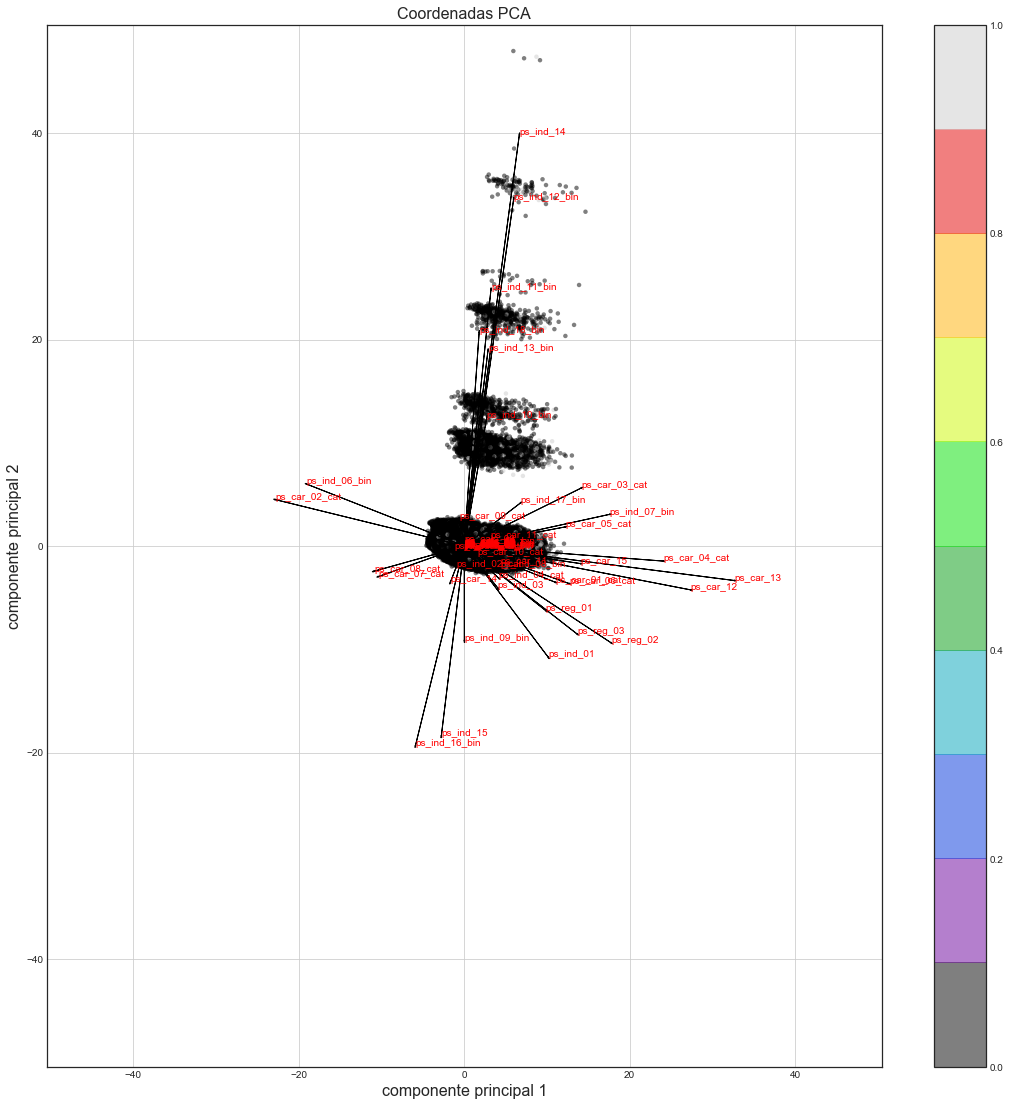

In [51]:
# componente principal 1 y 2
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(1,1,1)
PCA_plot(X_std, nombres_atributos,
         pca, pcs_names, ax, pc_x=0, pc_y=1, escala_flechas=12.5)
plt.title('Coordenadas PCA', fontsize=16)
lim = np.abs(plt.axis()).max()
plt.axis([-lim, lim, -lim, lim])
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


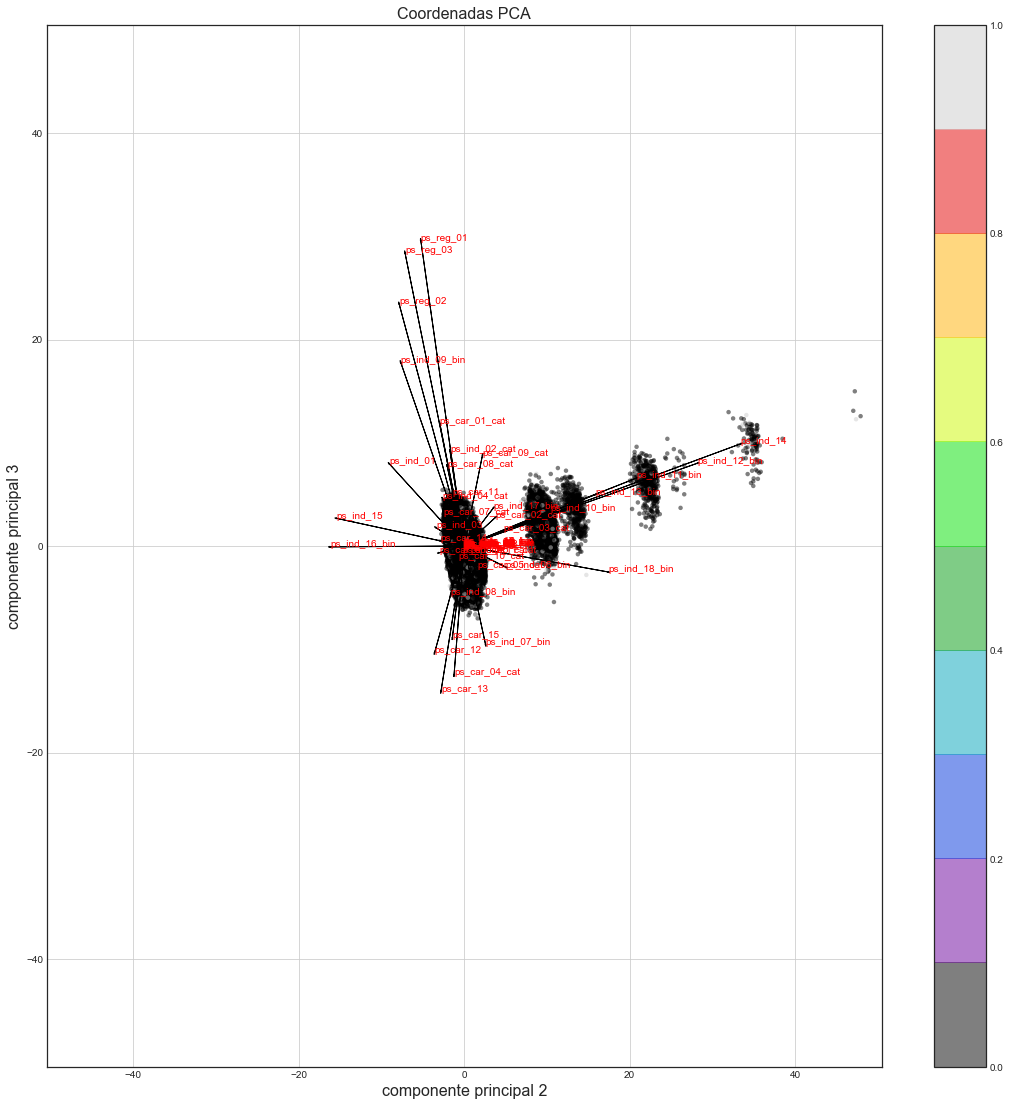

In [52]:
# componente principal 2 y 3
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(1,1,1)
PCA_plot(X_std, nombres_atributos,
         pca, pcs_names, ax, pc_x=1, pc_y=2, escala_flechas=10.5)
plt.title('Coordenadas PCA', fontsize=16)
lim = np.abs(plt.axis()).max()
plt.axis([-lim, lim, -lim, lim])
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


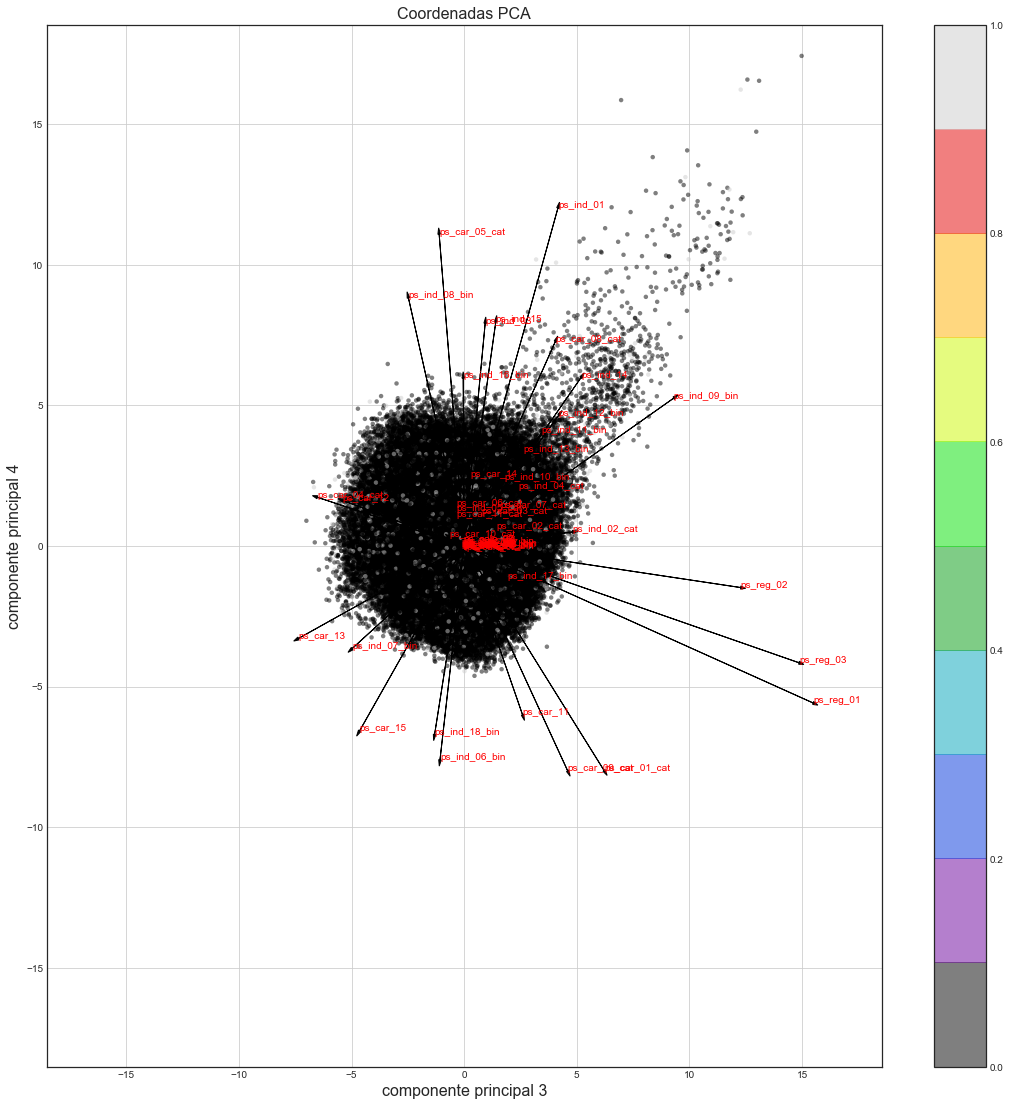

In [53]:
# componente principal 3 y 4
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(1,1,1)
PCA_plot(X_std, nombres_atributos,
         pca, pcs_names, ax, pc_x=2, pc_y=3, escala_flechas=5.5)
plt.title('Coordenadas PCA', fontsize=16)
lim = np.abs(plt.axis()).max()
plt.axis([-lim, lim, -lim, lim])
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


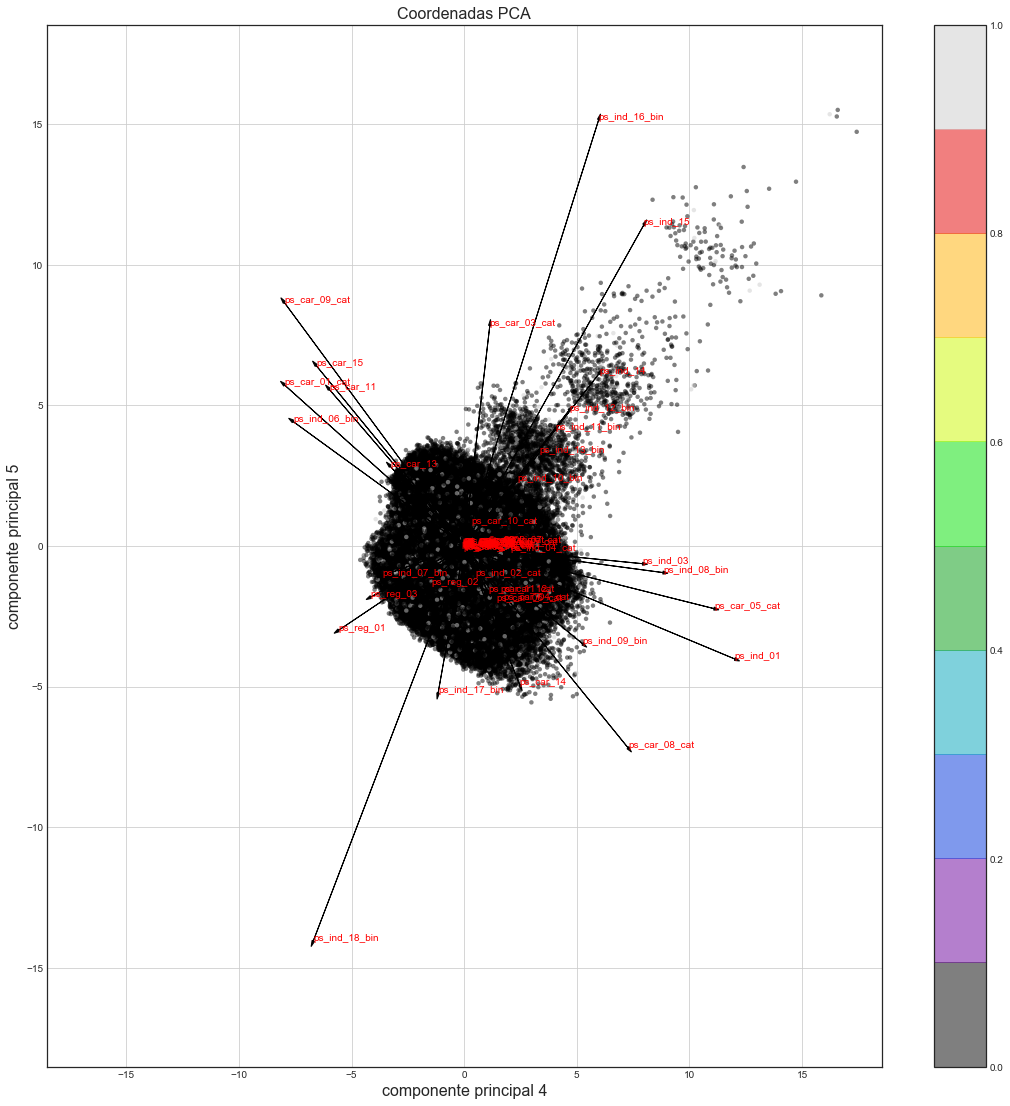

In [54]:
# componente principal 4 y 5
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(1,1,1)
PCA_plot(X_std, nombres_atributos,
         pca, pcs_names, ax, pc_x=3, pc_y=4, escala_flechas=5.5)
plt.title('Coordenadas PCA', fontsize=16)
lim = np.abs(plt.axis()).max()
plt.axis([-lim, lim, -lim, lim])
plt.show()

Viendo lo obtenido con PCA, nos hemos dado cuenta que para las primeras componentes principales  los atributos originales parecen tener mayor importancia y en la gran mayoría coinciden con los atributos obtenidos en los métodos de filtrado, por ello hemos decidido quedarnos con el conjunto de variables que obtuvimos con la técnica de Mutual information.

Serían los siguientes atributos los seleccionados:

ps_ind_17_bin 	
ps_ind_06_bin	
ps_ind_07_bin 	
ps_car_03_cat 	
ps_car_04_cat 	 	
ps_ind_16_bin 		
ps_car_07_cat 		
ps_reg_02 		
ps_ind_05_cat 	
ps_car_05_cat  	
ps_car_08_cat 		
ps_ind_15 		
ps_reg_01 		
ps_car_15 	 	
ps_reg_03 		
ps_ind_01 	
ps_ind_04_cat 	
ps_ind_03 		
ps_ind_08_bin 	
ps_car_11 	
ps_ind_12_bin 		
ps_ind_09_bin 		
ps_car_13 		
ps_car_06_cat 		
ps_car_01_cat 	
ps_car_11_cat 		
ps_ind_18_bin 		
ps_car_14 		
ps_ind_02_cat 		
ps_car_12   
ps_ind_11_bin 	 	
ps_ind_14 		

In [55]:
# formar conjuntos finales de train y test para entrenar y testear los modelos, quedándonos con los atributos elegidos
atributos_seleccionados = ['ps_ind_17_bin', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_car_03_cat', 'ps_car_04_cat',\
                        'ps_ind_16_bin', 'ps_car_07_cat', 'ps_reg_02', 'ps_ind_05_cat', 'ps_car_05_cat', \
                        'ps_car_08_cat', 'ps_ind_15', 'ps_reg_01', 'ps_car_15', 'ps_reg_03', 'ps_ind_01', \
                        'ps_ind_04_cat', 'ps_ind_03', 'ps_ind_08_bin', 'ps_car_11', 'ps_ind_12_bin', 'ps_ind_09_bin',\
                        'ps_car_13', 'ps_car_06_cat', 'ps_car_01_cat', 'ps_car_11_cat', 'ps_ind_18_bin', 'ps_car_14',\
                        'ps_ind_02_cat', 'ps_car_12', 'ps_ind_11_bin', 'ps_ind_14']

X_train_final = X_train[atributos_seleccionados]
X_test_final = X_test[atributos_seleccionados]

print(X_train_final.shape)
print(X_test_final.shape)

(416648, 32)
(178564, 32)


### 5. Entrenamiento de un clasificador SVM y ajuste de parámetros mediante validación cruzada

Entrena un clasificador SVM sobre el conjunto de datos anterior. 

- El objetivo debe ser detectar los ejemplos (clientes) que van a presentar un parte de accidente, es decir aquellos con clase igual a 1. 
- Utiliza validación cruzada de al menos 5 pliegues para seleccionar los mejores parámetros del clasificador. 
- Utiliza la métrica de evaluación más apropiada para este problema, justificando tu elección. Echa un vistazo al parámetro *scoring* de <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearchCV</a>.  
- Muestra en una tabla los resultados obtenidos, indica cuales son los mejores parámetros y justifica tu elección. 
- Muestra las curvas ROC y precision-recall para el mejor modelo.

In [56]:
# generamos samples de los datos de training ya que son muchos registros y da problemas de timeout
sample_1 = X_train_final.sample(frac=0.01, replace=True)
sample_2 = X_test_final.sample(frac=0.01, replace=True)
sample_3 = clases_train.sample(frac=0.01, replace=True)
sample_4 = clases_test.sample(frac=0.01, replace=True)

In [57]:
print(sample_1.shape)
print(sample_2.shape)
print(sample_3.shape)
print(sample_4.shape)

(4166, 32)
(1786, 32)
(4166,)
(1786,)


In [58]:
# Estandarizamos los datos
scalerX = skpp.StandardScaler()
X_train_std = scalerX.fit_transform(sample_1)
X_test_std = scalerX.transform(sample_2)

print (X_train_std.mean(axis=0))
print (X_train_std.std(axis=0))

print (X_test_std.mean(axis=0))
print (X_test_std.std(axis=0))

[-3.49642969e-17  6.39590797e-18  2.47308441e-17 -9.89233766e-17
 -2.55836319e-17 -1.07451254e-16  1.79085423e-17  8.69843484e-17
  3.24059337e-17  1.36446037e-17  4.09338110e-17  1.44121126e-16
 -3.78637752e-16  9.34655351e-16  4.34921742e-17  3.92282355e-17
  1.30476523e-16  1.55207367e-16 -4.26393864e-18  2.79714375e-16
  8.52787729e-18  1.06598466e-17 -2.78861587e-16 -5.62839901e-17
  5.67103840e-17  2.55836319e-17  7.16341692e-17  2.98475705e-17
  1.28770947e-16 -9.51711106e-16 -1.10862405e-17 -4.69033251e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.0020534  -0.01599383 -0.02268979 -0.01111533 -0.01196532  0.02644914
  0.01009329 -0.01055773  0.00913924  0.00649836  0.04954515  0.04378859
 -0.02402532 -0.02049148 -0.01499966  0.0394345   0.04150482  0.03299939
  0.05839773 -0.00947381  0.00069178 -0.00774022  0.00693502 -0.02838614
  0.02536187  0.01498925 -0.02252388  0.00134034  0.01373514 -0.03712856
  0.01385031  0

In [59]:
# Construcción del clasificador y ajuste de parámetros mediante validación cruzada
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

grid = [{'C': [1, 10, 100],
         'gamma': [10.0, 1.0, 0.1, 0.01], 
         'kernel': ['rbf']}]

clf_gridsearch = GridSearchCV(estimator=SVC(probability=True), param_grid=grid, cv=5)
clf_gridsearch.fit(X_train_std, sample_3.values)  

# Imprimimos los resultados para el mejor clasificador:
print("Best score = %f" % (clf_gridsearch.best_score_))
clf = clf_gridsearch.best_estimator_
print("Best model:")
print(clf)

# Calculamos el acierto en los conjuntos de entrenamiento y test:
score_train = clf.score(X_train_std, sample_3.values)
print("Score in training set = %f" % (score_train))

score_test = clf.score(X_test_std, sample_4.values)
print("Score in test set = %f" % (score_test))

Best score = 0.967835
Best model:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Score in training set = 0.969755
Score in test set = 0.964166


In [60]:
num_train_sample = sample_3.shape[0]
num_test_sample = sample_4.shape[0]

In [61]:
# Tasa de acierto (accuracy)
preds_train = clf.predict(X_train_std)
acc_train = float(np.sum(preds_train == sample_3)) / num_train_sample
print ("Acc. train = %f" % acc_train)
preds_test = clf.predict(X_test_std)
acc_test = float(np.sum(preds_test == sample_4)) / num_test_sample
print ("Acc. test = %f" % acc_test)

Acc. train = 0.969755
Acc. test = 0.964166


In [62]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

conf_mat_train = confusion_matrix(sample_3, preds_train)
print ("Training:")
print (conf_mat_train)

print ("Test:")
conf_mat_test = confusion_matrix(sample_4, preds_test)
print (conf_mat_test)

Training:
[[4032    0]
 [ 126    8]]
Test:
[[1722    0]
 [  64    0]]


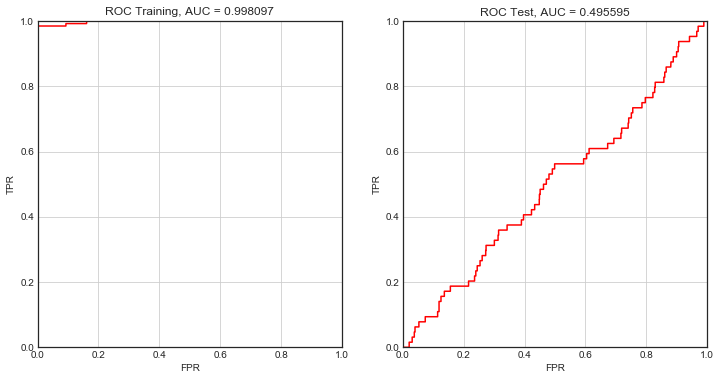

In [63]:
# curva roc
from sklearn import metrics

probs_train = clf.predict_proba(X_train_std)
fpr, tpr, thresholds = metrics.roc_curve(sample_3, probs_train[:,1], pos_label=1)
auc = metrics.roc_auc_score(sample_3, probs_train[:,1])

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(fpr, tpr, 'r-')
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Training, AUC = %f" % auc)

probs_test = clf.predict_proba(X_test_std)
fpr, tpr, thresholds = metrics.roc_curve(sample_4, probs_test[:,1], pos_label=1)
auc = metrics.roc_auc_score(sample_4, probs_test[:,1])

plt.subplot(122)
plt.plot(fpr, tpr, 'r-')
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Test, AUC = %f" % auc)

plt.show()

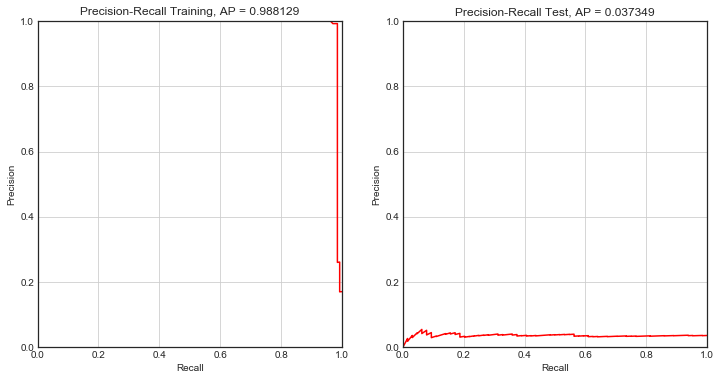

In [64]:
# Curva precision-recall
precision, recall, thresholds = metrics.precision_recall_curve(sample_3, probs_train[:,1])
ap = metrics.average_precision_score(sample_3, probs_train[:,1])

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(recall, precision, 'r-')
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Training, AP = %f" % ap)

precision, recall, thresholds = metrics.precision_recall_curve(sample_4, probs_test[:,1])
ap = metrics.average_precision_score(sample_4, probs_test[:,1])

plt.subplot(122)
plt.plot(recall, precision, 'r-')
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Test, AP = %f" % ap)

plt.show()

### 6. Otros clasificadores

Si quieres puedes probar con otros clasificadores de los que has visto en la asignatura. Si lo haces compara los resultados con los obtenidos en el apartado 5, mostrando todos los resultados en forma de tabla. Elige el mejor clasificador como modelo final, justificando tu elección.

#### Arbol de decisión

In [65]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(sample_1,sample_3)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
pdt = dtree.predict(sample_2)

print(classification_report(sample_4,pdt))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96      1722
          1       0.05      0.05      0.05        64

avg / total       0.93      0.93      0.93      1786



In [67]:
print(confusion_matrix(sample_4,pdt))

[[1660   62]
 [  61    3]]


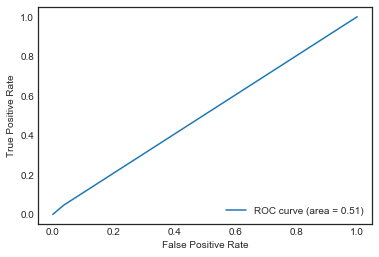

In [68]:
fpr,tpr,thresholds = roc_curve(sample_4, pdt)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000,max_features='sqrt',n_jobs=-1)
rfc.fit(sample_1, sample_3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
rfc_pred = rfc.predict(sample_2)

print(confusion_matrix(sample_4,rfc_pred))

[[1722    0]
 [  64    0]]


In [71]:
print(classification_report(sample_4,rfc_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1722
          1       0.00      0.00      0.00        64

avg / total       0.93      0.96      0.95      1786



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


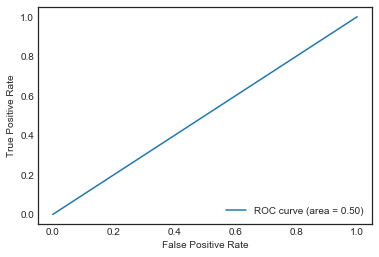

In [72]:
fpr,tpr,thresholds = roc_curve(sample_4, rfc_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### Red neuronal

In [73]:
from sklearn.neural_network import MLPClassifier

mlpClassifier = MLPClassifier(hidden_layer_sizes=(500,1000),random_state=101, max_iter=100000)

In [74]:
mlpClassifier.fit(sample_1,sample_3)

neural_netPred = mlpClassifier.predict(sample_2)

In [75]:
print(confusion_matrix(sample_4,neural_netPred))

[[1722    0]
 [  64    0]]


In [76]:
print(classification_report(sample_4,neural_netPred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1722
          1       0.00      0.00      0.00        64

avg / total       0.93      0.96      0.95      1786



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


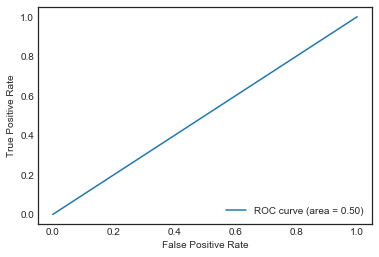

In [77]:
fpr,tpr,thresholds = roc_curve(sample_4, neural_netPred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### Comentarios
Viendo los resultados obtenidos en el punto 5 y en el punto 6, de los distintos clasificadores vemos como los mejores resultados se obtienen con el uso de SVMs, así que usaremos esta técnica en el punto siguiente.

### 7. Aplicación al conjunto de test

Utiliza el mejor modelo que hayas obtenido para seleccionar un conjunto de 1000 clientes del conjunto de test. Estos clientes deben ser los que más probabilidad tendrán de presentar un parte de accidente. ¿Cuál es la precisión obtenida sobre este conjunto de 1000 clientes? 

In [80]:
score_test = clf.score(X_test_std, sample_4.values)
print("Score in test set = %f" % (score_test))

Score in test set = 0.964166


In [81]:
preds_test = clf.predict(X_test_std)
acc_test = float(np.sum(preds_test == sample_4)) / num_test_sample
print ("Acc. test = %f" % acc_test)

Acc. test = 0.964166


### 8. Conclusiones

Después de analizar los datos y aplicar distintas técnicas de filtrado, selección y extracción de características, decidimos quedarnos con un grupo de atributos, entre las 30 y 35 características, que pensamos viendo los resultados de las técnicas aplicadas que eran los que tenían mayor importancia a la hora de predecir el resultado esperado, ya que el dataset contiene un número bastante elevado de atributos y además de que algunos no parecen aportar gran valor al problema, mientras más atributos se tengan más suelen verse penalizados los modelos de predicción.

Una vez tenemos el conjunto de datos de entrenamiento y test sin los atributos que no queremos tener en cuenta, ya podemos aplicar distintos clasificadores y modelos y estudiar cual parece darnos mejores resultados para quedarnos con él.
Hemos tenido el problema de que el número de registros es muy elevado y con los ordenadores personales que tenemos nos da problemas y no es capaz de obtener el resultado con el clasificador SVM. Así que hemos tenido que hacer unos samples con un número pequeño de registros para poder aplicar el resto de código, con lo que suponemos que puede ser un número insuficiente de datos y por tanto los resultados pueden verse afectados por ello.

El clasificador que mejor score parece obtener es el SVM, así que nos quedamos con él.